In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
%matplotlib inline
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import ExtraTreesRegressor

In [2]:
CMS_data = pd.read_csv('COVID_19_Nursing_Home_Data_02_20_2022.csv', parse_dates=['Week Ending'])

C:\Users\569051\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,84,85) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
CMS_data.shape

(1407230, 234)

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
CMS_data.head()

,Week Ending,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Provider Phone Number,County,Submitted Data,Passed Quality Assurance Check,Residents Weekly Admissions COVID-19,Residents Total Admissions COVID-19,Residents Weekly Confirmed COVID-19,Residents Total Confirmed COVID-19,Residents Weekly Suspected COVID-19,Residents Total Suspected COVID-19,Residents Weekly All Deaths,Residents Total All Deaths,Residents Weekly COVID-19 Deaths,Residents Total COVID-19 Deaths,Number of All Beds,Total Number of Occupied Beds,Resident Access to Testing in Facility,Laboratory Type Is State Health Dept,Laboratory Type Is Private Lab,Laboratory Type Is Other,Able to Test or Obtain Resources to Test All Current Residents Within Next 7 Days,Reason for Not Testing Residents - Lack of PPE for Personnel,Reason for Not Testing Residents - Lack of Supplies,Reason for Not Testing Residents - Lack of Access to Laboratory,Reason for Not Testing Residents - Lack of Access to Trained Personnel,Reason for Not Testing Residents - Uncertainty About Reimbursement,Reason for Not Testing Residents - Other,During Past Two Weeks Average Time to Receive Resident Test Results,Has Facility Performed Resident Tests Since Last Report,Tested Residents with New Signs or Symptoms,Tested Asymptomatic Residents in a Unit or Section After a New Case,Tested Asymptomatic Residents Facility-Wide After a New Case,Tested Asymptomatic Residents Without Known Exposure as Surveillance,Tested Another Subgroup of Residents,Able to Test or Obtain Resources to Test All Staff and/or Personnel Within Next 7 Days,Reason for Not Testing Staff and/or Personnel - Lack of PPE for Personnel,Reason for Not Testing Staff and/or Personnel - Lack of Supplies,Reason for Not Testing Staff and/or Personnel - Lack of Access to Laboratory,Reason for Not Testing Staff and/or Personnel - Lack of Access to Trained Personnel,Reason for Not Testing Staff and/or Personnel - Uncertainty About Reimbursement,Reason for Not Testing Staff and/or Personnel - Other,During Past Two Weeks Average Time to Receive Staff and/or Personnel Test Results,Has Facility Performed Staff and/or Personnel Tests Since Last Report,Tested Staff and/or Personnel with New Signs or Symptoms,Tested Asymptomatic Staff and/or Personnel in a Unit or Section After a New Case,Tested Asymptomatic Staff and/or Personnel Facility-Wide After a New Case,Tested Asymptomatic Staff and/or Personnel Without Known Exposure as Surveillance,Tested Another Subgroup of Staff and/or Personnel,In-House Point-of-Care Test Machine,COVID-19 Point-of-Care Tests Performed on Residents Since Last Report,COVID-19 Point-of-Care Tests Performed on Staff and/or Personnel Since Last Report,Enough Supplies to Test All Staff and/or Personnel Using Point-of-Care Test Machine,Staff Weekly Confirmed COVID-19,Staff Total Confirmed COVID-19,Staff Weekly Suspected COVID-19,Staff Total Suspected COVID-19,Staff Weekly COVID-19 Deaths,Staff Total COVID-19 Deaths,Shortage of Nursing Staff,Shortage of Clinical Staff,Shortage of Aides,Shortage of Other Staff,Any Current Supply of N95 Masks,One-Week Supply of N95 Masks,Any Current Supply of Surgical Masks,One-Week Supply of Surgical Masks,Any Current Supply of Eye Protection,One-Week Supply of Eye Protection,Any Current Supply of Gowns,One-Week Supply of Gowns,Any Current Supply of Gloves,One-Week Supply of Gloves,Any Current Supply of Hand Sanitizer,One-Week Supply of Hand Sanitizer,Ventilator Dependent Unit,Number of Ventilators in Facility,Number of Ventilators in Use for COVID-19,Any Current Supply of Ventilator Supplies,One-Week Supply of Ventilator Supplies,"Weekly Resident Confirmed COVID-19 Cases Per 1,000 Residents","Weekly Resident COVID-19 Deaths Per 1,000 Residents","Total Resident Confirmed COVID-19 Cases Per 1,000 Residents","Total Resident COVID-19 Deaths Per 1,000 Residents",Total Residents COVID-19 Deaths as a Percentage of Confirmed COVID-19 Cases,Three or Mor

In [6]:
featured_cms_data = CMS_data[['Week Ending','Federal Provider Number','Provider Name','Provider State',
                              'Residents Weekly Confirmed COVID-19','Residents Weekly All Deaths',
                              'Residents Weekly COVID-19 Deaths','Number of All Beds','Total Number of Occupied Beds',
                              'Staff Weekly Confirmed COVID-19','Staff Weekly COVID-19 Deaths','Shortage of Nursing Staff',
                              'Shortage of Clinical Staff','Shortage of Aides','Shortage of Other Staff',
                              'Weekly Resident Confirmed COVID-19 Cases Per 1,000 Residents',
                              'Weekly Resident COVID-19 Deaths Per 1,000 Residents',
                              'Number of Staff and/or Personnel with a New Positive COVID-19 Test Result',
                              'Percentage of Current Residents who Received a Completed or Partial COVID-19 Vaccination at Any Time',
                              'Percentage of Current Healthcare Personnel who Received a Completed COVID-19 Vaccination at Any Time',
                              'Percentage of Current Residents with a Completed Vaccination who Received a COVID-19 Vaccine Booster at Any Time',
                              'Percentage of Current Healthcare Personnel with a Completed Vaccination who Received a COVID-19 Vaccine Booster at Any Time']]

In [7]:
featured_cms_data.to_csv('featured_cms_data.csv')

In [8]:
filtered_cms_data = pd.read_csv('featured_cms_data.csv', parse_dates=['Week Ending'])

C:\Users\569051\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [9]:
filtered_cms_data.rename(columns = {'Provider Name':'Provider','Provider State':'State',
                              'Residents Weekly Confirmed COVID-19':'Residents COVID','Residents Weekly All Deaths':'Residents All Deaths',
                              'Residents Weekly COVID-19 Deaths':'Residents COVID Deaths','Number of All Beds':'Total Beds','Total Number of Occupied Beds':'Occupied Beds',
                              'Staff Weekly Confirmed COVID-19':'Staff COVID','Staff Weekly COVID-19 Deaths': 'Staff COVID Deaths',
                              'Weekly Resident Confirmed COVID-19 Cases Per 1,000 Residents':'Resident COVID Per 1000',
                              'Weekly Resident COVID-19 Deaths Per 1,000 Residents':'Resident COVID Death Per 1000',
                              'Number of Staff and/or Personnel with a New Positive COVID-19 Test Result':'Staff New COVID',
                              'Percentage of Current Residents who Received a Completed or Partial COVID-19 Vaccination at Any Time':'Residents Vaxed',
                              'Percentage of Current Healthcare Personnel who Received a Completed COVID-19 Vaccination at Any Time':'Staff Vaxed',
                              'Percentage of Current Residents with a Completed Vaccination who Received a COVID-19 Vaccine Booster at Any Time':'Residents Boosted',
                              'Percentage of Current Healthcare Personnel with a Completed Vaccination who Received a COVID-19 Vaccine Booster at Any Time':'Staff Boosted'},inplace=True)

In [10]:
filtered_cms_data.head()

,Unnamed: 0,Week Ending,Federal Provider Number,Provider,State,Residents COVID,Residents All Deaths,Residents COVID Deaths,Total Beds,Occupied Beds,Staff COVID,Staff COVID Deaths,Shortage of Nursing Staff,Shortage of Clinical Staff,Shortage of Aides,Shortage of Other Staff,Resident COVID Per 1000,Resident COVID Death Per 1000,Staff New COVID,Residents Vaxed,Staff Vaxed,Residents Boosted,Staff Boosted
0,0,2020-05-24,15009,"BURNS NURSING HOME, INC.",AL,45.0,4.0,4.0,57.0,45.0,33.0,0.0,N,N,N,N,1000.0,88.89,NaN,NaN,NaN,NaN,NaN
1,1,2020-05-31,15009,"BURNS NURSING HOME, INC.",AL,0.0,0.0,0.0,57.0,42.0,2.0,0.0,N,N,N,N,0.0,0.00,NaN,NaN,NaN,NaN,NaN
2,2,2020-06-07,15009,"BURNS NURSING HOME, INC.",AL,0.0,0.0,0.0,57.0,43.0,0.0,0.0,N,N,N,N,0.0,0.00,NaN,NaN,NaN,NaN,NaN
3,3,2020-06-14,15009,"BURNS NURSING HOME, INC.",AL,0.0,0.0,0.0,57.0,43.0,0.0,0.0,N,N,N,N,0.0,0.00,NaN,NaN,NaN,NaN,NaN
4,4,2020-06-21,15009,"BURNS NURSING HOME, INC.",AL,0.0,0.0,0.0,57.0,45.0,0.0,0.0,N,N,N,N,0.0,0.00,NaN,NaN,NaN,NaN,NaN


In [11]:
filtered_cms_data['Federal Provider Number'].nunique()

15509

In [18]:
filtered_cms_data11 = pd.merge(demographics,filtered_cms_data,how='outer')

In [17]:
filtered_cms_data11['Federal Provider Number'].nunique()

5429

In [211]:
filtered_cms_data11.loc[filtered_cms_data11['Federal Provider Number']=='215007']

,Federal Provider Number,pctblack,pcthisp,pctwhite,Unnamed: 0,Week Ending,Provider,State,Residents COVID,Residents All Deaths,Residents COVID Deaths,Total Beds,Occupied Beds,Staff COVID,Staff COVID Deaths,Shortage of Nursing Staff,Shortage of Clinical Staff,Shortage of Aides,Shortage of Other Staff,Resident COVID Per 1000,Resident COVID Death Per 1000,Staff New COVID,Residents Vaxed,Staff Vaxed,Residents Boosted,Staff Boosted
191283,215007,20.51,0.0,79.49,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [212]:
filtered_cms_data11.loc[filtered_cms_data11['Provider']=='WICOMICO NURSING HOME']

,Federal Provider Number,pctblack,pcthisp,pctwhite,Unnamed: 0,Week Ending,Provider,State,Residents COVID,Residents All Deaths,Residents COVID Deaths,Total Beds,Occupied Beds,Staff COVID,Staff COVID Deaths,Shortage of Nursing Staff,Shortage of Clinical Staff,Shortage of Aides,Shortage of Other Staff,Resident COVID Per 1000,Resident COVID Death Per 1000,Staff New COVID,Residents Vaxed,Staff Vaxed,Residents Boosted,Staff Boosted
897078,215007,NaN,NaN,NaN,515201.0,2020-05-24,WICOMICO NURSING HOME,MD,0.0,0.0,0.0,102.0,75.0,0.0,0.0,Y,N,N,Y,0.00,0.0,NaN,NaN,NaN,NaN,NaN
897079,215007,NaN,NaN,NaN,515202.0,2020-05-31,WICOMICO NURSING HOME,MD,0.0,1.0,0.0,102.0,78.0,0.0,0.0,Y,N,N,Y,0.00,0.0,NaN,NaN,NaN,NaN,NaN
897080,215007,NaN,NaN,NaN,515203.0,2020-06-07,WICOMICO NURSING HOME,MD,0.0,0.0,0.0,102.0,77.0,0.0,0.0,Y,N,N,Y,0.00,0.0,NaN,NaN,NaN,NaN,NaN
897081,215007,NaN,NaN,NaN,515204.0,2020-06-14,WICOMICO NURSING HOME,MD,0.0,3.0,0.0,102.0,77.0,0.0,0.0,Y,N,N,Y,0.00,0.0,NaN,NaN,NaN,NaN,NaN
897082,215007,NaN,NaN,NaN,515205.0,2020-06-21,WICOMICO NURSING HOME,MD,0.0,0.0,0.0,102.0,78.0,0.0,0.0,Y,N,N,Y,0.00,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897165,215007,NaN,NaN,NaN,515288.0,2022-01-23,WICOMICO NURSING HOME,MD,1.0,3.0,0.0,102.0,68.0,4.0,0.0,Y,N,Y,Y,14.71,0.0,4.0,100.0,90.000,92.754,50.505
897166,215007,NaN,NaN,NaN,515289.0,2022-01-30,WICOMICO NURSING HOME,MD,0.0,0.0,0.0,102.0,69.0,1.0,0.0,Y,N,Y,Y,0.00,0.0,1.0,100.0,86.364,91.429,51.579
897167,215007,NaN,NaN,NaN,515290.0,2022-02-06,WICOMICO NURSING HOME,MD,0.0,0.0,0.0,102.0,70.0,0.0,0.0,Y,N,Y,Y,0.00,0.0,0.0,100.0,87.156,93.939,51.579
897168,215007,NaN,NaN,NaN,515291.0,2022-02-13,WICOMICO NURSING HOME,MD,0.0,0.0,0.0,102.0,66.0,0.0,0.0,Y,N,Y,Y,0.00,0.0,0.0,100.0,90.244,91.176,46.847


In [15]:
community_cases=pd.read_csv('covid_confirmed_usafacts data corrections.csv')

In [16]:
community_cases.head()

,countyFIPS,County Name,State,StateFIPS,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,2/1/2020,2/2/2020,2/3/2020,2/4/2020,2/5/2020,2/6/2020,2/7/2020,2/8/2020,2/9/2020,2/10/2020,2/11/2020,2/12/2020,2/13/2020,2/14/2020,2/15/2020,2/16/2020,2/17/2020,2/18/2020,2/19/2020,2/20/2020,2/21/2020,2/22/2020,2/23/2020,2/24/2020,2/25/2020,2/26/2020,2/27/2020,2/28/2020,2/29/2020,3/1/2020,3/2/2020,3/3/2020,3/4/2020,3/5/2020,3/6/2020,3/7/2020,3/8/2020,3/9/2020,3/10/2020,3/11/2020,3/12/2020,3/13/2020,3/14/2020,3/15/2020,3/16/2020,3/17/2020,3/18/2020,3/19/2020,3/20/2020,3/21/2020,3/22/2020,3/23/2020,3/24/2020,3/25/2020,3/26/2020,3/27/2020,3/28/2020,3/29/2020,3/30/2020,3/31/2020,4/1/2020,4/2/2020,4/3/2020,4/4/2020,4/5/2020,4/6/2020,4/7/2020,4/8/2020,4/9/2020,4/10/2020,4/11/2020,4/12/2020,4/13/2020,4/14/2020,4/15/2020,4/16/2020,4/17/2020,4/18/2020,4/19/2020,4/20/2020,4/21/2020,4/22/2020,4/23/2020,4/24/2020,4/25/2020,4/26/2020,4/27/2020,4/28/2020,4/29/2020,4/30/2020,5/1/2020,5/2/2020,5/3/2020,5/4/2020,5/5/2020,5/6/2020,5/7/2020,5/8/2020,5/9/2020,5/10/2020,5/11/2020,5/12/2020,5/13/2020,5/14/2020,5/15/2020,5/16/2020,5/17/2020,5/18/2020,5/19/2020,5/20/2020,5/21/2020,5/22/2020,5/23/2020,5/24/2020,5/25/2020,5/26/2020,5/27/2020,5/28/2020,5/29/2020,5/30/2020,5/31/2020,6/1/2020,6/2/2020,6/3/2020,6/4/2020,6/5/2020,6/6/2020,6/7/2020,6/8/2020,6/9/2020,6/10/2020,6/11/2020,6/12/2020,6/13/2020,6/14/2020,6/15/2020,6/16/2020,6/17/2020,6/18/2020,6/19/2020,6/20/2020,6/21/2020,6/22/2020,6/23/2020,6/24/2020,6/25/2020,6/26/2020,6/27/2020,6/28/2020,6/29/2020,6/30/2020,7/1/2020,7/2/2020,7/3/2020,7/4/2020,7/5/2020,7/6/2020,7/7/2020,7/8/2020,7/9/2020,7/10/2020,7/11/2020,7/12/2020,7/13/2020,7/14/2020,7/15/2020,7/16/2020,7/17/2020,7/18/2020,7/19/2020,7/20/2020,7/21/2020,7/22/2020,7/23/2020,7/24/2020,7/25/2020,7/26/2020,7/27/2020,7/28/2020,7/29/2020,7/30/2020,7/31/2020,8/1/2020,8/2/2020,8/3/2020,8/4/2020,8/5/2020,8/6/2020,8/7/2020,8/8/2020,8/9/2020,8/10/2020,8/11/2020,8/12/2020,8/13/2020,8/14/2020,8/15/2020,8/16/2020,8/17/2020,8/18/2020,8/19/2020,8/20/2020,8/21/2020,8/22/2020,8/23/2020,8/24/2020,8/25/2020,8/26/2020,8/27/2020,8/28/2020,8/29/2020,8/30/2020,8/31/2020,9/1/2020,9/2/2020,9/3/2020,9/4/2020,9/5/2020,9/6/2020,9/7/2020,9/8/2020,9/9/2020,9/10/2020,9/11/2020,9/12/2020,9/13/2020,9/14/2020,9/15/2020,9/16/2020,9/17/2020,9/18/2020,9/19/2020,9/20/2020,9/21/2020,9/22/2020,9/23/2020,9/24/2020,9/25/2020,9/26/2020,9/27/2020,9/28/2020,9/29/2020,9/30/2020,10/1/2020,10/2/2020,10/3/2020,10/4/2020,10/5/2020,10/6/2020,10/7/2020,10/8/2020,10/9/2020,10/10/2020,10/11/2020,10/12/2020,10/13/2020,10/14/2020,10/15/2020,10/16/2020,10/17/2020,10/18/2020,10/19/2020,10/20/2020,10/21/2020,10/22/2020,10/23/2020,10/24/2020,10/25/2020,10/26/2020,10/27/2020,10/28/2020,10/29/2020,10/30/2020,10/31/2020,11/1/2020,11/2/2020,11/3/2020,11/4/2020,11/5/2020,11/6/2020,11/7/2020,11/8/2020,11/9/2020,11/10/2020,11/11/2020,11/12/2020,11/13/2020,11/14/2020,11/15/2020,11/16/2020,11/17/2020,11/18/2020,11/19/2020,11/20/2020,11/21/2020,11/22/2020,11/23/2020,11/24/2020,11/25/2020,11/26/2020,11/27/2020,11/28/2020,11/29/2020,11/30/2020,12/1/2020,12/2/2020,12/3/2020,12/4/2020,12/5/2020,12/6/2020,12/7/2020,12/8/2020,12/9/2020,12/10/2020,12/11/2020,12/12/2020,12/13/2020,12/14/2020,12/15/2020,12/16/2020,12/17/2020,12/18/2020,12/19/2020,12/20/2020,12/21/2020,12/22/2020,12/23/2020,12/24/2020,12/25/2020,12/26/2020,12/27/2020,12/28/2020,12/29/2020,12/30/2020,12/31/2020,1/1/2021,1/2/2021,1/3/2021,1/4/2021,1/5/2021,1/6/2021,1/7/2021,1/8/2021,1/9/2021,1/10/2021,1/11/2021,1/12/2021,1/13/2021,1/14/2021,1/15/2021,1/16/2021,1/17/2021,1/18/2021,1/19/2021,1/20/2021,1/21/2021,1/22/2021,1/23/2021,1/24/2021,1/25/2021,1/26/2021,1/27/2021,1/28/2021,1/29/2021,1/30/2021,1/31/2021,2/1/2021,2/2/2021,2/3/2021,2/4/2021,2/5/2021,2/6/2021,2/7/2021,2/8/2021,2/9/2021,2/10/2021,2/11/2021,2/12/2021,2/13/2021,2/14/2021,2/15/2021,2/16/2021,2/17/2021,2/18/2021,2/19/2021,2/20/2021,2/21/2021,2/22/2021,2/23/

In [17]:
cases_state = community_cases.drop(columns = ['countyFIPS','StateFIPS','County Name','1/22/2020','1/23/2020','1/24/2020','1/25/2020','1/26/2020'])
cases_states_daily_total = cases_state.groupby('State').sum()
new_cases_daily_total = cases_states_daily_total.diff(axis = 1)

In [18]:
new_cases_daily_total_modified = new_cases_daily_total.T.reset_index()
new_cases_daily_total_modified = new_cases_daily_total_modified.assign(Weeks = new_cases_daily_total_modified['index']).drop(columns = 'index')
new_cases_daily_total_modified['Weeks'] = new_cases_daily_total_modified['Weeks'].astype('datetime64[ns]')
new_cases_weekly_total_method3 = new_cases_daily_total_modified.resample('W-Sun',on='Weeks').sum()
display(new_cases_weekly_total_method3.head(5))
                                                                                         

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Weeks,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-02,0.0,0.0,0.0,0.0,-739.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-09,0.0,0.0,0.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2020-02-16,0.0,0.0,0.0,0.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-23,0.0,0.0,0.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-01,0.0,0.0,0.0,0.0,245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0


In [19]:
updated_community_cases = new_cases_weekly_total_method3.reset_index()
community_cases2 = updated_community_cases.drop(range(0,16))

In [20]:
community_cases2.head()

State,Weeks,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
16,2020-05-24,18.0,2739.0,1144.0,2402.0,15892.0,2188.0,3046.0,987.0,1134.0,5275.0,4569.0,5.0,2557.0,209.0,16010.0,3604.0,1011.0,897.0,2634.0,6672.0,8346.0,308.0,2782.0,4917.0,1275.0,1963.0,14.0,4700.0,467.0,1771.0,549.0,7569.0,849.0,996.0,11394.0,3988.0,725.0,304.0,5474.0,1758.0,1281.0,574.0,2577.0,7564.0,1146.0,5859.0,16.0,1425.0,3058.0,265.0,271.0
17,2020-05-31,32.0,3342.0,1294.0,3780.0,19877.0,2332.0,1712.0,691.0,695.0,5296.0,4921.0,8.0,2286.0,213.0,10007.0,3200.0,711.0,1149.0,2821.0,4302.0,5565.0,330.0,2092.0,4203.0,1486.0,2235.0,36.0,4459.0,211.0,1938.0,509.0,6621.0,989.0,713.0,9255.0,3598.0,385.0,321.0,4217.0,524.0,1767.0,429.0,2776.0,8939.0,951.0,8357.0,25.0,1878.0,3222.0,251.0,66.0
18,2020-06-07,111.0,2317.0,2096.0,6770.0,22548.0,1621.0,1732.0,531.0,480.0,7760.0,4906.0,22.0,2114.0,299.0,7500.0,2819.0,702.0,1582.0,2872.0,6475.0,5254.0,250.0,6831.0,3039.0,1312.0,1784.0,32.0,7860.0,286.0,1563.0,389.0,3809.0,868.0,1053.0,7327.0,2967.0,732.0,561.0,3665.0,0.0,2425.0,443.0,3402.0,10691.0,2584.0,5803.0,82.0,2063.0,2602.0,138.0,43.0
19,2020-06-14,138.0,5069.0,2999.0,8802.0,26666.0,1127.0,1085.0,435.0,323.0,11627.0,5252.0,53.0,2300.0,259.0,4818.0,2521.0,616.0,1158.0,3526.0,2140.0,3729.0,222.0,1598.0,2615.0,1978.0,2241.0,58.0,8580.0,219.0,1101.0,278.0,2801.0,713.0,1547.0,5227.0,2673.0,1082.0,831.0,3208.0,1006.0,4511.0,459.0,3605.0,12876.0,2470.0,4091.0,64.0,2088.0,2120.0,150.0,111.0
20,2020-06-21,96.0,4786.0,2831.0,16699.0,41551.0,1408.0,695.0,253.0,505.0,21688.0,6646.0,86.0,1983.0,606.0,4328.0,2507.0,1116.0,1295.0,3552.0,1474.0,2431.0,165.0,1687.0,2426.0,2700.0,1085.0,114.0,8683.0,208.0,1077.0,231.0,2255.0,660.0,2007.0,4612.0,3658.0,2282.0,1302.0,2933.0,447.0,5864.0,406.0,4555.0,23747.0,3178.0,3456.0,32.0,2859.0,2354.0,245.0,139.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,2022-01-09,8551.0,61234.0,36291.0,63640.0,763121.0,101260.0,63258.0,13826.0,18103.0,396565.0,69599.0,21029.0,20070.0,7682.0,223112.0,82582.0,46518.0,59737.0,79659.0,125739.0,93401.0,6650.0,143608.0,41910.0,73499.0,42810.0,5139.0,145745.0,8197.0,19002.0,14567.0,214788.0,18988.0,27711.0,667040.0,135734.0,20135.0,38437.0,188008.0,18379.0,72932.0,6889.0,47199.0,348032.0,42103.0,102518.0,7823.0,81676.0,85189.0,23526.0,4219.0
102,2022-01-16,15144.0,46774.0,56223.0,118064.0,703515.0,83602.0,63576.0,13759.0,23219.0,429312.0,133889.0,25234.0,31743.0,12625.0,201864.0,96536.0,55211.0,59465.0,88087.0,132254.0,68527.0,7477.0,126691.0,71259.0,80950.0,48081.0,9215.0,186339.0,12902.0,28120.0,19993.0,179575.0,29774.0,43877.0,370740.0,155862.0,48130.0,53691.0,193490.0,31445.0,104873.0,12628.0,71822.0,449799.0,62744.0,130381.0,7882.0,110279.0,124903.0,26047.0,6603.0
103,2022-01-23,15260.0,116259.0,54989.0,138758.0,622522.0,61501.0,33955.0,5329.0,14173.0,288638.0,83388.0,34712.0,38559.0,16422.0,185536.0,98683.0,60132.0,80939.0,63329.0,99103.0,35843.0,6047.0,137687.0,75904.0,89693.0,46754.0,10015.0,166327.0,16562.0,29150.0,20830.0,90506.0,38798.0,41736.0,178215.0,172875.0,71724.0,46569.0,113778.0,30912.0,112585.0,13973.0,107207.0,400350.0,65604.0,100296.0,7658.0,109783.0,126661.0,29396.0,8909.0
104,2022-01-30,14893.0,32268.0,39182.0,127457.0,376932.0,44014.0,24300.0,2617.0,9996.0,197768.0,90596.0,17702.0,34904.0,19983.0,85964.0,79585.0,41419.0,84603.0,100031.0,55524.0,18515.0,7330.0,108723.0,86088.0,63380.0,36284.0,16708.0,206804.0,11608.0,17697.0,13863.0,52554.0,32446.0,33583.0,93272.0,81846.0,77270.0,60692.0,84087.0,17487.0,89406.0,10995.0,111916.0,252232.0,41446.0,73890.0,4433.0,141900.0,48989.0,31758.0,9157.0


In [21]:
droppedJune14=community_cases2.drop([71])

In [22]:
droppedJune14.rename(columns ={'Weeks':'Week Ending'}, inplace=True)

In [23]:
melted = droppedJune14.melt(id_vars=['Week Ending'],var_name='State',value_name='Community Cases')

In [148]:
melted.head()

,Week Ending,State,Community Cases
0,2020-05-24,AK,18.0
1,2020-05-31,AK,32.0
2,2020-06-07,AK,111.0
3,2020-06-14,AK,138.0
4,2020-06-21,AK,96.0


In [24]:
filtered_cms_data2 = filtered_cms_data.merge(melted,on=["State","Week Ending"])

In [25]:
filtered_cms_data2.head()

,Unnamed: 0,Week Ending,Federal Provider Number,Provider,State,Residents COVID,Residents All Deaths,Residents COVID Deaths,Total Beds,Occupied Beds,Staff COVID,Staff COVID Deaths,Shortage of Nursing Staff,Shortage of Clinical Staff,Shortage of Aides,Shortage of Other Staff,Resident COVID Per 1000,Resident COVID Death Per 1000,Staff New COVID,Residents Vaxed,Staff Vaxed,Residents Boosted,Staff Boosted,Community Cases
0,0,2020-05-24,15009,"BURNS NURSING HOME, INC.",AL,45.0,4.0,4.0,57.0,45.0,33.0,0.0,N,N,N,N,1000.00,88.89,NaN,NaN,NaN,NaN,NaN,2739.0
1,92,2020-05-24,15010,COOSA VALLEY HEALTHCARE CENTER,AL,0.0,0.0,0.0,85.0,75.0,2.0,0.0,N,N,N,N,0.00,0.00,NaN,NaN,NaN,NaN,NaN,2739.0
2,184,2020-05-24,15012,HIGHLANDS HEALTH AND REHAB,AL,1.0,5.0,0.0,50.0,42.0,1.0,0.0,N,N,N,N,23.81,0.00,NaN,NaN,NaN,NaN,NaN,2739.0
3,276,2020-05-24,15014,EASTVIEW REHABILITATION & HEALTHCARE CENTER,AL,0.0,0.0,0.0,90.0,82.0,0.0,0.0,Y,N,N,N,0.00,0.00,NaN,NaN,NaN,NaN,NaN,2739.0
4,368,2020-05-24,15015,PLANTATION MANOR NURSING HOME,AL,0.0,1.0,0.0,103.0,81.0,0.0,0.0,Y,N,Y,N,0.00,0.00,NaN,NaN,NaN,NaN,NaN,2739.0


In [26]:
filtered_cms_data2.drop('Unnamed: 0',axis=1)

,Week Ending,Federal Provider Number,Provider,State,Residents COVID,Residents All Deaths,Residents COVID Deaths,Total Beds,Occupied Beds,Staff COVID,Staff COVID Deaths,Shortage of Nursing Staff,Shortage of Clinical Staff,Shortage of Aides,Shortage of Other Staff,Resident COVID Per 1000,Resident COVID Death Per 1000,Staff New COVID,Residents Vaxed,Staff Vaxed,Residents Boosted,Staff Boosted,Community Cases
0,2020-05-24,15009,"BURNS NURSING HOME, INC.",AL,45.0,4.0,4.0,57.0,45.0,33.0,0.0,N,N,N,N,1000.00,88.89,NaN,NaN,NaN,NaN,NaN,2739.0
1,2020-05-24,15010,COOSA VALLEY HEALTHCARE CENTER,AL,0.0,0.0,0.0,85.0,75.0,2.0,0.0,N,N,N,N,0.00,0.00,NaN,NaN,NaN,NaN,NaN,2739.0
2,2020-05-24,15012,HIGHLANDS HEALTH AND REHAB,AL,1.0,5.0,0.0,50.0,42.0,1.0,0.0,N,N,N,N,23.81,0.00,NaN,NaN,NaN,NaN,NaN,2739.0
3,2020-05-24,15014,EASTVIEW REHABILITATION & HEALTHCARE CENTER,AL,0.0,0.0,0.0,90.0,82.0,0.0,0.0,Y,N,N,N,0.00,0.00,NaN,NaN,NaN,NaN,NaN,2739.0
4,2020-05-24,15015,PLANTATION MANOR NURSING HOME,AL,0.0,1.0,0.0,103.0,81.0,0.0,0.0,Y,N,Y,N,0.00,0.00,NaN,NaN,NaN,NaN,NaN,2739.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1360897,2022-02-06,535056,SAGE VIEW CARE CENTER,WY,0.0,0.0,0.0,82.0,38.0,6.0,0.0,Y,N,Y,N,0.00,0.00,6.0,89.474,83.562,0.000,0.000,5316.0
1360898,2022-02-06,535057,GOSHEN HEALTHCARE COMMUNITY,WY,0.0,1.0,1.0,103.0,66.0,4.0,0.0,Y,N,Y,Y,0.00,15.15,4.0,86.364,89.189,87.719,38.384,5316.0
1360899,2022-02-06,53A002,AMIE HOLT CARE CENTER,WY,1.0,0.0,0.0,44.0,32.0,1.0,0.0,N,N,Y,N,31.25,0.00,1.0,100.000,83.036,90.625,55.914,5316.0
1360900,2022-02-06,53A050,STAR VALLEY CARE CENTER,WY,0.0,1.0,0.0,24.0,17.0,0.0,0.0,Y,N,Y,N,0.00,0.00,0.0,88.235,76.471,80.000,21.154,5316.0


In [27]:
deaths=pd.read_csv('covid_deaths_usafacts data correction.csv')

In [28]:
deaths_state = deaths.drop(columns = ['countyFIPS','StateFIPS','County Name','1/22/2020','1/23/2020','1/24/2020','1/25/2020','1/26/2020'])
deaths_states_daily_total = deaths_state.groupby('State').sum()
new_deaths_daily_total = deaths_states_daily_total.diff(axis = 1)

In [29]:
new_deaths_daily_total_modified = new_deaths_daily_total.T.reset_index()
new_deaths_daily_total_modified = new_deaths_daily_total_modified.assign(Weeks = new_deaths_daily_total_modified['index']).drop(columns = 'index')
new_deaths_daily_total_modified['Weeks'] = new_deaths_daily_total_modified['Weeks'].astype('datetime64[ns]')
new_deaths_weekly_total_method3 = new_deaths_daily_total_modified.resample('W-Sun',on='Weeks').sum()
display(new_deaths_weekly_total_method3.head(5))

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Weeks,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [30]:
updated_community_deaths = new_deaths_weekly_total_method3.reset_index()
community_deaths2 = updated_community_deaths.drop(range(0,16))

In [31]:
droppedJune14deaths=community_deaths2.drop([71])
droppedJune14deaths.rename(columns ={'Weeks':'Week Ending'}, inplace=True)

In [32]:
melted2 = droppedJune14deaths.melt(id_vars=['Week Ending'],var_name='State',value_name='Community Deaths')

In [33]:
filtered_cms_data3 = filtered_cms_data2.merge(melted2,on=["State","Week Ending"])

In [36]:
filtered_cms_data3.drop('Unnamed: 0',axis=1)

,Week Ending,Federal Provider Number,Provider,State,Residents COVID,Residents All Deaths,Residents COVID Deaths,Total Beds,Occupied Beds,Staff COVID,Staff COVID Deaths,Shortage of Nursing Staff,Shortage of Clinical Staff,Shortage of Aides,Shortage of Other Staff,Resident COVID Per 1000,Resident COVID Death Per 1000,Staff New COVID,Residents Vaxed,Staff Vaxed,Residents Boosted,Staff Boosted,Community Cases,Community Deaths
0,2020-05-24,15009,"BURNS NURSING HOME, INC.",AL,45.0,4.0,4.0,57.0,45.0,33.0,0.0,N,N,N,N,1000.00,88.89,NaN,NaN,NaN,NaN,NaN,2739.0,0.0
1,2020-05-24,15010,COOSA VALLEY HEALTHCARE CENTER,AL,0.0,0.0,0.0,85.0,75.0,2.0,0.0,N,N,N,N,0.00,0.00,NaN,NaN,NaN,NaN,NaN,2739.0,0.0
2,2020-05-24,15012,HIGHLANDS HEALTH AND REHAB,AL,1.0,5.0,0.0,50.0,42.0,1.0,0.0,N,N,N,N,23.81,0.00,NaN,NaN,NaN,NaN,NaN,2739.0,0.0
3,2020-05-24,15014,EASTVIEW REHABILITATION & HEALTHCARE CENTER,AL,0.0,0.0,0.0,90.0,82.0,0.0,0.0,Y,N,N,N,0.00,0.00,NaN,NaN,NaN,NaN,NaN,2739.0,0.0
4,2020-05-24,15015,PLANTATION MANOR NURSING HOME,AL,0.0,1.0,0.0,103.0,81.0,0.0,0.0,Y,N,Y,N,0.00,0.00,NaN,NaN,NaN,NaN,NaN,2739.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1360897,2022-02-06,535056,SAGE VIEW CARE CENTER,WY,0.0,0.0,0.0,82.0,38.0,6.0,0.0,Y,N,Y,N,0.00,0.00,6.0,89.474,83.562,0.000,0.000,5316.0,25.0
1360898,2022-02-06,535057,GOSHEN HEALTHCARE COMMUNITY,WY,0.0,1.0,1.0,103.0,66.0,4.0,0.0,Y,N,Y,Y,0.00,15.15,4.0,86.364,89.189,87.719,38.384,5316.0,25.0
1360899,2022-02-06,53A002,AMIE HOLT CARE CENTER,WY,1.0,0.0,0.0,44.0,32.0,1.0,0.0,N,N,Y,N,31.25,0.00,1.0,100.000,83.036,90.625,55.914,5316.0,25.0
1360900,2022-02-06,53A050,STAR VALLEY CARE CENTER,WY,0.0,1.0,0.0,24.0,17.0,0.0,0.0,Y,N,Y,N,0.00,0.00,0.0,88.235,76.471,80.000,21.154,5316.0,25.0


In [44]:
filtered_cms_data3.to_csv('featured_cms_data_with_community_cases_and_deaths.csv')

In [43]:
filtered_cms_data3.State.nunique()

51

In [151]:
filtered_cms_data3.dtypes

Unnamed: 0                                int64
Week Ending                      datetime64[ns]
Federal Provider Number                  object
Provider                                 object
State                                    object
Residents COVID                         float64
Residents All Deaths                    float64
Residents COVID Deaths                  float64
Total Beds                              float64
Occupied Beds                           float64
Staff COVID                             float64
Staff COVID Deaths                      float64
Shortage of Nursing Staff                object
Shortage of Clinical Staff               object
Shortage of Aides                        object
Shortage of Other Staff                  object
Resident COVID Per 1000                 float64
Resident COVID Death Per 1000           float64
Staff New COVID                         float64
Residents Vaxed                         float64
Staff Vaxed                             

In [86]:
index_names = filtered_cms_data3[ filtered_cms_data3['State'] == 'AK' ].index
  
# drop these row indexes
# from dataFrame
filtered_cms_data3.drop(index_names, inplace = True)

In [124]:
filtered_cms_data3.loc[filtered_cms_data3['Provider']=='WICOMICO NURSING HOME']

,Unnamed: 0,Week Ending,Federal Provider Number,Provider,State,Residents COVID,Residents All Deaths,Residents COVID Deaths,Total Beds,Occupied Beds,Staff COVID,Staff COVID Deaths,Shortage of Nursing Staff,Shortage of Clinical Staff,Shortage of Aides,Shortage of Other Staff,Resident COVID Per 1000,Resident COVID Death Per 1000,Staff New COVID,Residents Vaxed,Staff Vaxed,Residents Boosted,Staff Boosted,Community Cases,Community Deaths
545222,515201,2020-05-24,215007,WICOMICO NURSING HOME,MD,0.0,0.0,0.0,102.0,75.0,0.0,0.0,Y,N,N,Y,0.00,0.00,NaN,NaN,NaN,NaN,NaN,8346.0,333.0
545448,515202,2020-05-31,215007,WICOMICO NURSING HOME,MD,0.0,1.0,0.0,102.0,78.0,0.0,0.0,Y,N,N,Y,0.00,0.00,NaN,NaN,NaN,NaN,NaN,5565.0,231.0
545674,515203,2020-06-07,215007,WICOMICO NURSING HOME,MD,0.0,0.0,0.0,102.0,77.0,0.0,0.0,Y,N,N,Y,0.00,0.00,NaN,NaN,NaN,NaN,NaN,5254.0,353.0
545900,515204,2020-06-14,215007,WICOMICO NURSING HOME,MD,0.0,3.0,0.0,102.0,77.0,0.0,0.0,Y,N,N,Y,0.00,0.00,NaN,NaN,NaN,NaN,NaN,3729.0,186.0
546126,515205,2020-06-21,215007,WICOMICO NURSING HOME,MD,0.0,0.0,0.0,102.0,78.0,0.0,0.0,Y,N,N,Y,0.00,0.00,NaN,NaN,NaN,NaN,NaN,2431.0,132.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564170,515286,2022-01-09,215007,WICOMICO NURSING HOME,MD,1.0,1.0,1.0,102.0,71.0,4.0,0.0,Y,N,Y,Y,14.08,14.08,4.0,100.0,89.744,95.522,41.905,93401.0,271.0
564394,515287,2022-01-16,215007,WICOMICO NURSING HOME,MD,3.0,1.0,0.0,102.0,69.0,1.0,0.0,Y,N,Y,Y,43.48,0.00,1.0,100.0,87.805,98.529,46.296,68527.0,426.0
564618,515288,2022-01-23,215007,WICOMICO NURSING HOME,MD,1.0,3.0,0.0,102.0,68.0,4.0,0.0,Y,N,Y,Y,14.71,0.00,4.0,100.0,90.000,92.754,50.505,35843.0,417.0
564842,515289,2022-01-30,215007,WICOMICO NURSING HOME,MD,0.0,0.0,0.0,102.0,69.0,1.0,0.0,Y,N,Y,Y,0.00,0.00,1.0,100.0,86.364,91.429,51.579,18515.0,432.0


In [176]:
maryland=filtered_cms_data3[filtered_cms_data3['State']=='MD']

In [233]:
maine=filtered_cms_data3[filtered_cms_data3['State']=='ME']

In [234]:
new_mexico=filtered_cms_data3[filtered_cms_data3['State']=='NM']

In [236]:
idaho=filtered_cms_data3[filtered_cms_data3['State']=='ID']

In [237]:
louisiana=filtered_cms_data3[filtered_cms_data3['State']=='LA']

In [238]:
ohio=filtered_cms_data3[filtered_cms_data3['State']=='OH']

In [177]:
maryland.to_csv('maryland.csv')

In [13]:
demographics = pd.read_csv('facility_2020_modded.csv')

In [217]:
demographics.head()

,Federal Provider Number,Provider,State,pctblack,pcthisp,pctwhite
0,35272,"VI AT GRAYHAWK, A VI AND PLAZA COMPANIES COMMU...",AZ,0.0,0.0,100.0
1,85003,WILLOWBROOKE COURT AT COUNTRY HOUSE,DE,0.0,0.0,100.0
2,105630,VICAR'S LANDING NURSING HOME,FL,0.0,0.0,100.0
3,105912,FLORIDA HOSPITAL NORTH PINELLAS,FL,0.0,0.0,100.0
4,105961,SHANDS JACKSONVILLE MEDICAL CENTER,FL,50.0,0.0,50.0


In [218]:
merged_maryland = maryland.merge(demographics,on=["Provider"])

In [239]:
merged_maine = maine.merge(demographics,on=["Provider"])

In [271]:
merged_maine.head()

,Unnamed: 0,Week Ending,Federal Provider Number_x,Provider,State_x,Residents COVID,Residents All Deaths,Residents COVID Deaths,Total Beds,Occupied Beds,Staff COVID,Staff COVID Deaths,Shortage of Nursing Staff,Shortage of Clinical Staff,Shortage of Aides,Shortage of Other Staff,Resident COVID Per 1000,Resident COVID Death Per 1000,Staff New COVID,Residents Vaxed,Staff Vaxed,Residents Boosted,Staff Boosted,Community Cases,Community Deaths,Federal Provider Number_y,State_y,pctblack,pcthisp,pctwhite
0,506494,2020-05-24,205003,CEDARS NURSING CARE CENTER,ME,0.0,0.0,0.0,102.0,74.0,1.0,0.0,Y,N,Y,N,0.0,0.0,NaN,NaN,NaN,NaN,NaN,308.0,8.0,205003,ME,0.0,0.0,100.0
1,506495,2020-05-31,205003,CEDARS NURSING CARE CENTER,ME,0.0,1.0,0.0,102.0,72.0,0.0,0.0,Y,N,Y,Y,0.0,0.0,NaN,NaN,NaN,NaN,NaN,330.0,11.0,205003,ME,0.0,0.0,100.0
2,506496,2020-06-07,205003,CEDARS NURSING CARE CENTER,ME,0.0,0.0,0.0,102.0,77.0,0.0,0.0,Y,N,Y,Y,0.0,0.0,NaN,NaN,NaN,NaN,NaN,250.0,10.0,205003,ME,0.0,0.0,100.0
3,506497,2020-06-14,205003,CEDARS NURSING CARE CENTER,ME,0.0,0.0,0.0,102.0,80.0,0.0,0.0,Y,N,Y,Y,0.0,0.0,NaN,NaN,NaN,NaN,NaN,222.0,1.0,205003,ME,0.0,0.0,100.0
4,506498,2020-06-21,205003,CEDARS NURSING CARE CENTER,ME,0.0,0.0,0.0,102.0,82.0,0.0,0.0,Y,N,Y,Y,0.0,0.0,NaN,NaN,NaN,NaN,NaN,165.0,2.0,205003,ME,0.0,0.0,100.0


In [240]:
merged_new_mexico = new_mexico.merge(demographics,on=["Provider"])

In [241]:
merged_idaho = idaho.merge(demographics,on=["Provider"])

In [242]:
merged_louisiana = louisiana.merge(demographics,on=["Provider"])

In [243]:
merged_ohio = ohio.merge(demographics,on=["Provider"])

In [245]:
#merged_maryland.drop(columns =['Federal Provider Number_y','State_y'])

In [246]:
merged_maine.drop(columns =['Federal Provider Number_y','State_y'])

,Unnamed: 0,Week Ending,Federal Provider Number_x,Provider,State_x,Residents COVID,Residents All Deaths,Residents COVID Deaths,Total Beds,Occupied Beds,Staff COVID,Staff COVID Deaths,Shortage of Nursing Staff,Shortage of Clinical Staff,Shortage of Aides,Shortage of Other Staff,Resident COVID Per 1000,Resident COVID Death Per 1000,Staff New COVID,Residents Vaxed,Staff Vaxed,Residents Boosted,Staff Boosted,Community Cases,Community Deaths,pctblack,pcthisp,pctwhite
0,506494,2020-05-24,205003,CEDARS NURSING CARE CENTER,ME,0.0,0.0,0.0,102.0,74.0,1.0,0.0,Y,N,Y,N,0.00,0.0,NaN,NaN,NaN,NaN,NaN,308.0,8.0,0.0,0.0,100.0
1,506495,2020-05-31,205003,CEDARS NURSING CARE CENTER,ME,0.0,1.0,0.0,102.0,72.0,0.0,0.0,Y,N,Y,Y,0.00,0.0,NaN,NaN,NaN,NaN,NaN,330.0,11.0,0.0,0.0,100.0
2,506496,2020-06-07,205003,CEDARS NURSING CARE CENTER,ME,0.0,0.0,0.0,102.0,77.0,0.0,0.0,Y,N,Y,Y,0.00,0.0,NaN,NaN,NaN,NaN,NaN,250.0,10.0,0.0,0.0,100.0
3,506497,2020-06-14,205003,CEDARS NURSING CARE CENTER,ME,0.0,0.0,0.0,102.0,80.0,0.0,0.0,Y,N,Y,Y,0.00,0.0,NaN,NaN,NaN,NaN,NaN,222.0,1.0,0.0,0.0,100.0
4,506498,2020-06-21,205003,CEDARS NURSING CARE CENTER,ME,0.0,0.0,0.0,102.0,82.0,0.0,0.0,Y,N,Y,Y,0.00,0.0,NaN,NaN,NaN,NaN,NaN,165.0,2.0,0.0,0.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6821,515010,2022-01-09,205187,PIPER SHORES,ME,1.0,1.0,0.0,40.0,31.0,3.0,0.0,Y,Y,Y,Y,32.26,0.0,3.0,96.774,99.099,100.000,46.364,6650.0,72.0,0.0,0.0,100.0
6822,515011,2022-01-16,205187,PIPER SHORES,ME,0.0,0.0,0.0,40.0,29.0,0.0,0.0,Y,Y,Y,Y,0.00,0.0,0.0,96.667,99.057,96.552,62.857,7477.0,55.0,0.0,0.0,100.0
6823,515012,2022-01-23,205187,PIPER SHORES,ME,0.0,1.0,0.0,40.0,27.0,0.0,0.0,Y,Y,Y,Y,0.00,0.0,0.0,96.667,99.057,96.552,62.857,6047.0,40.0,0.0,0.0,100.0
6824,515013,2022-01-30,205187,PIPER SHORES,ME,0.0,0.0,0.0,40.0,27.0,0.0,0.0,Y,Y,Y,Y,0.00,0.0,0.0,96.552,99.057,100.000,62.857,7330.0,40.0,0.0,0.0,100.0


In [247]:
merged_new_mexico.drop(columns =['Federal Provider Number_y','State_y'])

,Unnamed: 0,Week Ending,Federal Provider Number_x,Provider,State_x,Residents COVID,Residents All Deaths,Residents COVID Deaths,Total Beds,Occupied Beds,Staff COVID,Staff COVID Deaths,Shortage of Nursing Staff,Shortage of Clinical Staff,Shortage of Aides,Shortage of Other Staff,Resident COVID Per 1000,Resident COVID Death Per 1000,Staff New COVID,Residents Vaxed,Staff Vaxed,Residents Boosted,Staff Boosted,Community Cases,Community Deaths,pctblack,pcthisp,pctwhite
0,780058,2020-05-24,325030,SANTA FE CARE CENTER,NM,0.0,0.0,0.0,120.0,82.0,0.0,0.0,N,N,N,N,0.00,0.0,NaN,NaN,NaN,NaN,NaN,849.0,49.0,0.0,47.62,45.78
1,780059,2020-05-31,325030,SANTA FE CARE CENTER,NM,0.0,0.0,0.0,120.0,81.0,0.0,0.0,N,N,N,N,0.00,0.0,NaN,NaN,NaN,NaN,NaN,989.0,54.0,0.0,47.62,45.78
2,780060,2020-06-07,325030,SANTA FE CARE CENTER,NM,0.0,0.0,0.0,120.0,82.0,0.0,0.0,Y,Y,Y,Y,0.00,0.0,NaN,NaN,NaN,NaN,NaN,868.0,39.0,0.0,47.62,45.78
3,780061,2020-06-14,325030,SANTA FE CARE CENTER,NM,0.0,0.0,0.0,120.0,81.0,0.0,0.0,Y,N,N,N,0.00,0.0,NaN,NaN,NaN,NaN,NaN,713.0,40.0,0.0,47.62,45.78
4,780062,2020-06-21,325030,SANTA FE CARE CENTER,NM,0.0,0.0,0.0,120.0,80.0,0.0,0.0,N,N,N,N,0.00,0.0,NaN,NaN,NaN,NaN,NaN,660.0,34.0,0.0,47.62,45.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,785203,2022-01-09,325120,FORT BAYARD MEDICAL CENTER,NM,0.0,0.0,0.0,200.0,104.0,6.0,0.0,Y,N,Y,Y,0.00,0.0,6.0,98.077,96.970,100.000,50.781,18988.0,128.0,0.0,51.22,47.97
2221,785204,2022-01-16,325120,FORT BAYARD MEDICAL CENTER,NM,0.0,1.0,0.0,200.0,103.0,6.0,0.0,Y,N,Y,Y,0.00,0.0,7.0,98.077,96.970,100.000,50.781,29774.0,162.0,0.0,51.22,47.97
2222,785205,2022-01-23,325120,FORT BAYARD MEDICAL CENTER,NM,4.0,1.0,0.0,200.0,103.0,4.0,0.0,Y,N,Y,Y,38.83,0.0,4.0,98.077,96.970,96.078,51.563,38798.0,114.0,0.0,51.22,47.97
2223,785206,2022-01-30,325120,FORT BAYARD MEDICAL CENTER,NM,4.0,0.0,0.0,200.0,103.0,7.0,0.0,Y,N,Y,Y,38.83,0.0,7.0,98.058,96.958,96.040,54.902,32446.0,158.0,0.0,51.22,47.97


In [248]:
merged_idaho.drop(columns =['Federal Provider Number_y','State_y'])

,Unnamed: 0,Week Ending,Federal Provider Number_x,Provider,State_x,Residents COVID,Residents All Deaths,Residents COVID Deaths,Total Beds,Occupied Beds,Staff COVID,Staff COVID Deaths,Shortage of Nursing Staff,Shortage of Clinical Staff,Shortage of Aides,Shortage of Other Staff,Resident COVID Per 1000,Resident COVID Death Per 1000,Staff New COVID,Residents Vaxed,Staff Vaxed,Residents Boosted,Staff Boosted,Community Cases,Community Deaths,pctblack,pcthisp,pctwhite
0,264148,2020-05-24,135004,BOUNDARY COUNTY NURSING HOME,ID,0.0,0.0,0.0,28.0,22.0,0.0,0.0,N,N,N,N,0.00,0.0,NaN,NaN,NaN,NaN,NaN,209.0,5.0,0.0,0.0,100.00
1,264149,2020-05-31,135004,BOUNDARY COUNTY NURSING HOME,ID,0.0,0.0,0.0,28.0,23.0,0.0,0.0,N,N,N,N,0.00,0.0,NaN,NaN,NaN,NaN,NaN,213.0,4.0,0.0,0.0,100.00
2,264150,2020-06-07,135004,BOUNDARY COUNTY NURSING HOME,ID,0.0,0.0,0.0,28.0,23.0,0.0,0.0,N,N,N,N,0.00,0.0,NaN,NaN,NaN,NaN,NaN,299.0,1.0,0.0,0.0,100.00
3,264151,2020-06-14,135004,BOUNDARY COUNTY NURSING HOME,ID,0.0,0.0,0.0,28.0,23.0,0.0,0.0,N,N,N,N,0.00,0.0,NaN,NaN,NaN,NaN,NaN,259.0,3.0,0.0,0.0,100.00
4,264152,2020-06-21,135004,BOUNDARY COUNTY NURSING HOME,ID,0.0,0.0,0.0,28.0,23.0,0.0,0.0,N,N,N,N,0.00,0.0,NaN,NaN,NaN,NaN,NaN,606.0,3.0,0.0,0.0,100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4458,270683,2022-01-09,135137,PROMONTORY POINT REHABILITATION,ID,0.0,0.0,0.0,30.0,21.0,0.0,0.0,N,N,Y,N,0.00,0.0,0.0,81.818,92.537,44.444,27.419,7682.0,73.0,0.0,0.0,95.45
4459,270684,2022-01-16,135137,PROMONTORY POINT REHABILITATION,ID,0.0,0.0,0.0,30.0,25.0,3.0,0.0,Y,N,Y,N,0.00,0.0,3.0,85.185,92.537,39.130,27.419,12625.0,35.0,0.0,0.0,95.45
4460,270685,2022-01-23,135137,PROMONTORY POINT REHABILITATION,ID,6.0,0.0,0.0,30.0,17.0,10.0,0.0,Y,N,Y,N,352.94,0.0,10.0,92.593,94.030,40.000,28.571,16422.0,53.0,0.0,0.0,95.45
4461,270686,2022-01-30,135137,PROMONTORY POINT REHABILITATION,ID,1.0,0.0,0.0,30.0,19.0,0.0,0.0,Y,N,Y,N,52.63,0.0,0.0,100.000,94.030,36.842,26.984,19983.0,77.0,0.0,0.0,95.45


In [249]:
merged_louisiana.drop(columns =['Federal Provider Number_y','State_y'])

,Unnamed: 0,Week Ending,Federal Provider Number_x,Provider,State_x,Residents COVID,Residents All Deaths,Residents COVID Deaths,Total Beds,Occupied Beds,Staff COVID,Staff COVID Deaths,Shortage of Nursing Staff,Shortage of Clinical Staff,Shortage of Aides,Shortage of Other Staff,Resident COVID Per 1000,Resident COVID Death Per 1000,Staff New COVID,Residents Vaxed,Staff Vaxed,Residents Boosted,Staff Boosted,Community Cases,Community Deaths,pctblack,pcthisp,pctwhite
0,481213,2020-05-24,195136,PROGRESSIVE CARE CENTER,LA,9.0,4.0,4.0,81.0,38.0,3.0,0.0,Y,N,Y,Y,236.84,105.26,NaN,NaN,NaN,NaN,NaN,2634.0,144.0,66.67,0.0,33.33
1,481214,2020-05-31,195136,PROGRESSIVE CARE CENTER,LA,2.0,1.0,1.0,81.0,31.0,1.0,0.0,Y,N,Y,Y,64.52,32.26,NaN,NaN,NaN,NaN,NaN,2821.0,116.0,66.67,0.0,33.33
2,481215,2020-06-07,195136,PROGRESSIVE CARE CENTER,LA,0.0,0.0,0.0,81.0,34.0,0.0,0.0,Y,N,Y,N,0.00,0.00,NaN,NaN,NaN,NaN,NaN,2872.0,140.0,66.67,0.0,33.33
3,481216,2020-06-14,195136,PROGRESSIVE CARE CENTER,LA,0.0,0.0,0.0,81.0,37.0,0.0,0.0,N,N,N,N,0.00,0.00,NaN,NaN,NaN,NaN,NaN,3526.0,76.0,66.67,0.0,33.33
4,481217,2020-06-21,195136,PROGRESSIVE CARE CENTER,LA,0.0,0.0,0.0,81.0,41.0,0.0,0.0,Y,Y,Y,Y,0.00,0.00,NaN,NaN,NaN,NaN,NaN,3552.0,91.0,66.67,0.0,33.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18544,506143,2022-01-09,195637,REGENCY HOUSE OF ALEXANDRIA,LA,0.0,0.0,0.0,60.0,53.0,0.0,0.0,N,N,N,N,0.00,0.00,0.0,88.333,100.0,76.923,27.885,79659.0,68.0,0.00,0.0,97.87
18545,506144,2022-01-16,195637,REGENCY HOUSE OF ALEXANDRIA,LA,0.0,0.0,0.0,60.0,52.0,0.0,0.0,N,N,N,N,0.00,0.00,0.0,88.525,100.0,75.472,28.713,88087.0,83.0,0.00,0.0,97.87
18546,506145,2022-01-23,195637,REGENCY HOUSE OF ALEXANDRIA,LA,0.0,0.0,0.0,60.0,50.0,0.0,0.0,N,N,N,N,0.00,0.00,0.0,88.136,100.0,74.510,28.283,63329.0,187.0,0.00,0.0,97.87
18547,506146,2022-01-30,195637,REGENCY HOUSE OF ALEXANDRIA,LA,0.0,0.0,0.0,60.0,53.0,0.0,0.0,N,N,N,N,0.00,0.00,0.0,83.871,100.0,76.923,34.375,100031.0,307.0,0.00,0.0,97.87


In [250]:
merged_ohio.drop(columns =['Federal Provider Number_y','State_y'])

,Unnamed: 0,Week Ending,Federal Provider Number_x,Provider,State_x,Residents COVID,Residents All Deaths,Residents COVID Deaths,Total Beds,Occupied Beds,Staff COVID,Staff COVID Deaths,Shortage of Nursing Staff,Shortage of Clinical Staff,Shortage of Aides,Shortage of Other Staff,Resident COVID Per 1000,Resident COVID Death Per 1000,Staff New COVID,Residents Vaxed,Staff Vaxed,Residents Boosted,Staff Boosted,Community Cases,Community Deaths,pctblack,pcthisp,pctwhite
0,889634,2020-05-24,365005,THE CHATEAU AT MOUNTAIN CREST NURSING & REHAB CTR,OH,0.0,0.0,0.0,199.0,158.0,0.0,0.0,Y,N,Y,Y,0.00,0.00,NaN,NaN,NaN,NaN,NaN,3988.0,341.0,42.07,0.0,55.86
1,889635,2020-05-31,365005,THE CHATEAU AT MOUNTAIN CREST NURSING & REHAB CTR,OH,0.0,1.0,0.0,199.0,155.0,0.0,0.0,Y,N,Y,Y,0.00,0.00,NaN,NaN,NaN,NaN,NaN,3598.0,185.0,42.07,0.0,55.86
2,889636,2020-06-07,365005,THE CHATEAU AT MOUNTAIN CREST NURSING & REHAB CTR,OH,0.0,0.0,0.0,199.0,154.0,0.0,0.0,Y,N,Y,Y,0.00,0.00,NaN,NaN,NaN,NaN,NaN,2967.0,226.0,42.07,0.0,55.86
3,889637,2020-06-14,365005,THE CHATEAU AT MOUNTAIN CREST NURSING & REHAB CTR,OH,0.0,0.0,0.0,199.0,154.0,0.0,0.0,Y,Y,Y,Y,0.00,0.00,NaN,NaN,NaN,NaN,NaN,2673.0,180.0,42.07,0.0,55.86
4,889638,2020-06-21,365005,THE CHATEAU AT MOUNTAIN CREST NURSING & REHAB CTR,OH,0.0,0.0,0.0,199.0,156.0,2.0,0.0,Y,N,Y,Y,0.00,0.00,NaN,NaN,NaN,NaN,NaN,3658.0,143.0,42.07,0.0,55.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53228,972419,2022-01-09,366429,ALTERCARE ZANESVILLE INC.,OH,0.0,0.0,0.0,99.0,81.0,9.0,0.0,Y,N,Y,N,0.00,0.00,9.0,86.420,69.307,58.824,32.857,135734.0,624.0,0.00,0.0,93.15
53229,972420,2022-01-16,366429,ALTERCARE ZANESVILLE INC.,OH,10.0,0.0,0.0,99.0,80.0,4.0,0.0,Y,Y,Y,Y,125.00,0.00,4.0,82.500,69.307,59.375,34.286,155862.0,850.0,0.00,0.0,93.15
53230,972421,2022-01-23,366429,ALTERCARE ZANESVILLE INC.,OH,7.0,0.0,0.0,99.0,79.0,3.0,0.0,Y,N,Y,N,88.61,0.00,3.0,83.544,65.421,59.375,34.286,172875.0,1065.0,0.00,0.0,93.15
53231,972422,2022-01-30,366429,ALTERCARE ZANESVILLE INC.,OH,9.0,1.0,1.0,99.0,79.0,2.0,0.0,Y,N,Y,N,113.92,12.66,2.0,78.750,56.881,61.290,74.194,81846.0,1087.0,0.00,0.0,93.15


In [227]:
merged_maryland.rename(columns ={'Federal Provider Number_x':'Federal Provide Number','State_x':'State'}, inplace=True)

In [272]:
merged_maine.rename(columns ={'Federal Provider Number_x':'Federal Provide Number','State_x':'State'}, inplace=True)

In [273]:
merged_new_mexico.rename(columns ={'Federal Provider Number_x':'Federal Provide Number','State_x':'State'}, inplace=True)

In [274]:
merged_idaho.rename(columns ={'Federal Provider Number_x':'Federal Provide Number','State_x':'State'}, inplace=True)

In [275]:
merged_louisiana.rename(columns ={'Federal Provider Number_x':'Federal Provide Number','State_x':'State'}, inplace=True)

In [276]:
merged_ohio.rename(columns ={'Federal Provider Number_x':'Federal Provide Number','State_x':'State'}, inplace=True)

In [277]:
merged_maine.head()

,Unnamed: 0,Week Ending,Federal Provide Number,Provider,State,Residents COVID,Residents All Deaths,Residents COVID Deaths,Total Beds,Occupied Beds,Staff COVID,Staff COVID Deaths,Shortage of Nursing Staff,Shortage of Clinical Staff,Shortage of Aides,Shortage of Other Staff,Resident COVID Per 1000,Resident COVID Death Per 1000,Staff New COVID,Residents Vaxed,Staff Vaxed,Residents Boosted,Staff Boosted,Community Cases,Community Deaths,Federal Provider Number_y,State_y,pctblack,pcthisp,pctwhite
0,506494,2020-05-24,205003,CEDARS NURSING CARE CENTER,ME,0.0,0.0,0.0,102.0,74.0,1.0,0.0,Y,N,Y,N,0.0,0.0,NaN,NaN,NaN,NaN,NaN,308.0,8.0,205003,ME,0.0,0.0,100.0
1,506495,2020-05-31,205003,CEDARS NURSING CARE CENTER,ME,0.0,1.0,0.0,102.0,72.0,0.0,0.0,Y,N,Y,Y,0.0,0.0,NaN,NaN,NaN,NaN,NaN,330.0,11.0,205003,ME,0.0,0.0,100.0
2,506496,2020-06-07,205003,CEDARS NURSING CARE CENTER,ME,0.0,0.0,0.0,102.0,77.0,0.0,0.0,Y,N,Y,Y,0.0,0.0,NaN,NaN,NaN,NaN,NaN,250.0,10.0,205003,ME,0.0,0.0,100.0
3,506497,2020-06-14,205003,CEDARS NURSING CARE CENTER,ME,0.0,0.0,0.0,102.0,80.0,0.0,0.0,Y,N,Y,Y,0.0,0.0,NaN,NaN,NaN,NaN,NaN,222.0,1.0,205003,ME,0.0,0.0,100.0
4,506498,2020-06-21,205003,CEDARS NURSING CARE CENTER,ME,0.0,0.0,0.0,102.0,82.0,0.0,0.0,Y,N,Y,Y,0.0,0.0,NaN,NaN,NaN,NaN,NaN,165.0,2.0,205003,ME,0.0,0.0,100.0


In [285]:
merged_maryland.drop(columns =['Federal Provider Number_y','State_y'], inplace=True)
merged_maine.drop(columns =['Federal Provider Number_y','State_y'], inplace=True)
merged_new_mexico.drop(columns =['Federal Provider Number_y','State_y'], inplace=True)
merged_idaho.drop(columns =['Federal Provider Number_y','State_y'], inplace=True)
merged_louisiana.drop(columns =['Federal Provider Number_y','State_y'], inplace=True)
merged_ohio.drop(columns =['Federal Provider Number_y','State_y'], inplace=True)

In [286]:
merged_maryland.head()

,Unnamed: 0,Week Ending,Federal Provide Number,Provider,State,Residents COVID,Residents All Deaths,Residents COVID Deaths,Total Beds,Occupied Beds,Staff COVID,Staff COVID Deaths,Shortage of Nursing Staff,Shortage of Clinical Staff,Shortage of Aides,Shortage of Other Staff,Resident COVID Per 1000,Resident COVID Death Per 1000,Staff New COVID,Residents Vaxed,Staff Vaxed,Residents Boosted,Staff Boosted,Community Cases,Community Deaths,pctblack,pcthisp,pctwhite
0,515109,2020-05-24,215005,CADIA HEALTHCARE - ANNAPOLIS,MD,0.0,0.0,0.0,91.0,74.0,1.0,0.0,Y,N,Y,N,0.0,0.0,NaN,NaN,NaN,NaN,NaN,8346.0,333.0,49.23,0.0,41.54
1,515110,2020-05-31,215005,CADIA HEALTHCARE - ANNAPOLIS,MD,0.0,0.0,0.0,91.0,72.0,0.0,0.0,Y,N,Y,N,0.0,0.0,NaN,NaN,NaN,NaN,NaN,5565.0,231.0,49.23,0.0,41.54
2,515111,2020-06-07,215005,CADIA HEALTHCARE - ANNAPOLIS,MD,0.0,0.0,0.0,91.0,70.0,5.0,0.0,N,N,Y,N,0.0,0.0,NaN,NaN,NaN,NaN,NaN,5254.0,353.0,49.23,0.0,41.54
3,515112,2020-06-14,215005,CADIA HEALTHCARE - ANNAPOLIS,MD,0.0,0.0,0.0,91.0,71.0,0.0,0.0,N,N,Y,N,0.0,0.0,NaN,NaN,NaN,NaN,NaN,3729.0,186.0,49.23,0.0,41.54
4,515113,2020-06-21,215005,CADIA HEALTHCARE - ANNAPOLIS,MD,0.0,0.0,0.0,91.0,70.0,0.0,1.0,N,N,N,N,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2431.0,132.0,49.23,0.0,41.54


In [178]:
demographics.loc[demographics['Federal Provider Number']=='215007']

,Federal Provider Number,pctblack,pcthisp,pctwhite
3887,215007,20.51,0.0,79.49


In [101]:
filtered_cms_data4.shape

(538749, 30)

In [179]:
filtered_cms_data4 = filtered_cms_data3.merge(demographics,on=["Federal Provider Number"])

In [156]:
filtered_cms_data4.head()

,Unnamed: 0,Week Ending,Federal Provider Number,Provider,State,Residents COVID,Residents All Deaths,Residents COVID Deaths,Total Beds,Occupied Beds,Staff COVID,Staff COVID Deaths,Shortage of Nursing Staff,Shortage of Clinical Staff,Shortage of Aides,Shortage of Other Staff,Resident COVID Per 1000,Resident COVID Death Per 1000,Staff New COVID,Residents Vaxed,Staff Vaxed,Residents Boosted,Staff Boosted,Community Cases,Community Deaths,pctblack,pcthisp,pctwhite
0,92,2020-05-24,15010,COOSA VALLEY HEALTHCARE CENTER,AL,0.0,0.0,0.0,85.0,75.0,2.0,0.0,N,N,N,N,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2739.0,0.0,28.95,0.0,71.05
1,93,2020-05-31,15010,COOSA VALLEY HEALTHCARE CENTER,AL,0.0,0.0,0.0,85.0,74.0,0.0,0.0,N,N,N,N,0.0,0.0,NaN,NaN,NaN,NaN,NaN,3342.0,0.0,28.95,0.0,71.05
2,94,2020-06-07,15010,COOSA VALLEY HEALTHCARE CENTER,AL,0.0,0.0,0.0,85.0,74.0,0.0,0.0,N,N,N,N,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2317.0,0.0,28.95,0.0,71.05
3,95,2020-06-14,15010,COOSA VALLEY HEALTHCARE CENTER,AL,0.0,0.0,0.0,85.0,77.0,0.0,0.0,N,N,N,N,0.0,0.0,NaN,NaN,NaN,NaN,NaN,5069.0,0.0,28.95,0.0,71.05
4,96,2020-06-21,15010,COOSA VALLEY HEALTHCARE CENTER,AL,0.0,0.0,0.0,85.0,80.0,0.0,0.0,N,N,N,N,0.0,0.0,NaN,NaN,NaN,NaN,NaN,4786.0,0.0,28.95,0.0,71.05


In [180]:
filtered_cms_data4.loc[filtered_cms_data4['Federal Provider Number']==215007]

,Unnamed: 0,Week Ending,Federal Provider Number,Provider,State,Residents COVID,Residents All Deaths,Residents COVID Deaths,Total Beds,Occupied Beds,Staff COVID,Staff COVID Deaths,Shortage of Nursing Staff,Shortage of Clinical Staff,Shortage of Aides,Shortage of Other Staff,Resident COVID Per 1000,Resident COVID Death Per 1000,Staff New COVID,Residents Vaxed,Staff Vaxed,Residents Boosted,Staff Boosted,Community Cases,Community Deaths,pctblack,pcthisp,pctwhite


In [222]:
filtered_cms_data4.State.nunique()

42

In [96]:
filtered_cms_data4.State_y.unique()

array(['AL', 'CO', 'TN', 'FL', 'AZ', 'KS', 'NV', 'AR', 'MN', 'IA', 'IL',
       'CA', 'NY', 'IN', 'WA', 'TX', 'LA', 'SD', 'PA', 'KY', 'MI', 'SC',
       'NJ', 'NE', 'OK', 'VA', 'CT', 'OH', 'MT', 'DE', 'MA', 'RI', 'WI',
       'GA', 'MO', 'ID', 'WV', 'MD', 'ND', 'NC', 'ME', 'UT', 'MS', 'NH',
       'NM', 'OR', 'VT', 'WY'], dtype=object)

In [104]:
filtered_cms_data4.State_x.unique()

array(['AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'IL', 'IN',
       'IA', 'KS', 'KY', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV',
       'NH', 'NJ', 'NY', 'NC', 'ND', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD',
       'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [97]:
test_filtered_cms_data4=filtered_cms_data4[['State_x','State_y','Provider','Federal Provider Number_x','Federal Provider Number_y']]

In [98]:
test_filtered_cms_data4.to_csv('test_filtered_cms_data4.csv')

In [223]:
filtered_cms_data4.head()

,Unnamed: 0,Week Ending,Federal Provider Number,Provider,State,Residents COVID,Residents All Deaths,Residents COVID Deaths,Total Beds,Occupied Beds,Staff COVID,Staff COVID Deaths,Shortage of Nursing Staff,Shortage of Clinical Staff,Shortage of Aides,Shortage of Other Staff,Resident COVID Per 1000,Resident COVID Death Per 1000,Staff New COVID,Residents Vaxed,Staff Vaxed,Residents Boosted,Staff Boosted,Community Cases,Community Deaths,pctblack,pcthisp,pctwhite
0,92,2020-05-24,15010,COOSA VALLEY HEALTHCARE CENTER,AL,0.0,0.0,0.0,85.0,75.0,2.0,0.0,N,N,N,N,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2739.0,0.0,28.95,0.0,71.05
1,93,2020-05-31,15010,COOSA VALLEY HEALTHCARE CENTER,AL,0.0,0.0,0.0,85.0,74.0,0.0,0.0,N,N,N,N,0.0,0.0,NaN,NaN,NaN,NaN,NaN,3342.0,0.0,28.95,0.0,71.05
2,94,2020-06-07,15010,COOSA VALLEY HEALTHCARE CENTER,AL,0.0,0.0,0.0,85.0,74.0,0.0,0.0,N,N,N,N,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2317.0,0.0,28.95,0.0,71.05
3,95,2020-06-14,15010,COOSA VALLEY HEALTHCARE CENTER,AL,0.0,0.0,0.0,85.0,77.0,0.0,0.0,N,N,N,N,0.0,0.0,NaN,NaN,NaN,NaN,NaN,5069.0,0.0,28.95,0.0,71.05
4,96,2020-06-21,15010,COOSA VALLEY HEALTHCARE CENTER,AL,0.0,0.0,0.0,85.0,80.0,0.0,0.0,N,N,N,N,0.0,0.0,NaN,NaN,NaN,NaN,NaN,4786.0,0.0,28.95,0.0,71.05


In [292]:
fortyeight_states=[filtered_cms_data4,merged_maryland,merged_maine,merged_new_mexico,merged_idaho,merged_louisiana,merged_ohio]
filtered_cms_data26=pd.concat(fortyeight_states)

In [293]:
filtered_cms_data26.State.nunique()

48

In [294]:
filtered_cms_data26.head()

,Unnamed: 0,Week Ending,Federal Provider Number,Provider,State,Residents COVID,Residents All Deaths,Residents COVID Deaths,Total Beds,Occupied Beds,Staff COVID,Staff COVID Deaths,Shortage of Nursing Staff,Shortage of Clinical Staff,Shortage of Aides,Shortage of Other Staff,Resident COVID Per 1000,Resident COVID Death Per 1000,Staff New COVID,Residents Vaxed,Staff Vaxed,Residents Boosted,Staff Boosted,Community Cases,Community Deaths,pctblack,pcthisp,pctwhite,Federal Provide Number
0,92,2020-05-24,15010,COOSA VALLEY HEALTHCARE CENTER,AL,0.0,0.0,0.0,85.0,75.0,2.0,0.0,N,N,N,N,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2739.0,0.0,28.95,0.0,71.05,NaN
1,93,2020-05-31,15010,COOSA VALLEY HEALTHCARE CENTER,AL,0.0,0.0,0.0,85.0,74.0,0.0,0.0,N,N,N,N,0.0,0.0,NaN,NaN,NaN,NaN,NaN,3342.0,0.0,28.95,0.0,71.05,NaN
2,94,2020-06-07,15010,COOSA VALLEY HEALTHCARE CENTER,AL,0.0,0.0,0.0,85.0,74.0,0.0,0.0,N,N,N,N,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2317.0,0.0,28.95,0.0,71.05,NaN
3,95,2020-06-14,15010,COOSA VALLEY HEALTHCARE CENTER,AL,0.0,0.0,0.0,85.0,77.0,0.0,0.0,N,N,N,N,0.0,0.0,NaN,NaN,NaN,NaN,NaN,5069.0,0.0,28.95,0.0,71.05,NaN
4,96,2020-06-21,15010,COOSA VALLEY HEALTHCARE CENTER,AL,0.0,0.0,0.0,85.0,80.0,0.0,0.0,N,N,N,N,0.0,0.0,NaN,NaN,NaN,NaN,NaN,4786.0,0.0,28.95,0.0,71.05,NaN


In [296]:
filtered_cms_data26.to_csv('48state_covid.csv')

In [295]:
filtered_cms_data26.loc[filtered_cms_data26['State']=='MD']

,Unnamed: 0,Week Ending,Federal Provider Number,Provider,State,Residents COVID,Residents All Deaths,Residents COVID Deaths,Total Beds,Occupied Beds,Staff COVID,Staff COVID Deaths,Shortage of Nursing Staff,Shortage of Clinical Staff,Shortage of Aides,Shortage of Other Staff,Resident COVID Per 1000,Resident COVID Death Per 1000,Staff New COVID,Residents Vaxed,Staff Vaxed,Residents Boosted,Staff Boosted,Community Cases,Community Deaths,pctblack,pcthisp,pctwhite,Federal Provide Number
0,515109,2020-05-24,NaN,CADIA HEALTHCARE - ANNAPOLIS,MD,0.0,0.0,0.0,91.0,74.0,1.0,0.0,Y,N,Y,N,0.00,0.0,NaN,NaN,NaN,NaN,NaN,8346.0,333.0,49.23,0.0,41.54,215005
1,515110,2020-05-31,NaN,CADIA HEALTHCARE - ANNAPOLIS,MD,0.0,0.0,0.0,91.0,72.0,0.0,0.0,Y,N,Y,N,0.00,0.0,NaN,NaN,NaN,NaN,NaN,5565.0,231.0,49.23,0.0,41.54,215005
2,515111,2020-06-07,NaN,CADIA HEALTHCARE - ANNAPOLIS,MD,0.0,0.0,0.0,91.0,70.0,5.0,0.0,N,N,Y,N,0.00,0.0,NaN,NaN,NaN,NaN,NaN,5254.0,353.0,49.23,0.0,41.54,215005
3,515112,2020-06-14,NaN,CADIA HEALTHCARE - ANNAPOLIS,MD,0.0,0.0,0.0,91.0,71.0,0.0,0.0,N,N,Y,N,0.00,0.0,NaN,NaN,NaN,NaN,NaN,3729.0,186.0,49.23,0.0,41.54,215005
4,515113,2020-06-21,NaN,CADIA HEALTHCARE - ANNAPOLIS,MD,0.0,0.0,0.0,91.0,70.0,0.0,1.0,N,N,N,N,0.00,0.0,NaN,NaN,NaN,NaN,NaN,2431.0,132.0,49.23,0.0,41.54,215005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11786,535752,2022-01-09,NaN,ST. JOSEPH'S NURSING HOME,MD,0.0,0.0,0.0,44.0,42.0,2.0,0.0,N,N,N,N,0.00,0.0,2.0,100.0,100.0,0.0,61.111,93401.0,271.0,0.00,0.0,97.67,2.1e+105
11787,535753,2022-01-16,NaN,ST. JOSEPH'S NURSING HOME,MD,0.0,0.0,0.0,44.0,42.0,2.0,0.0,N,N,N,N,0.00,0.0,2.0,100.0,100.0,100.0,60.000,68527.0,426.0,0.00,0.0,97.67,2.1e+105
11788,535754,2022-01-23,NaN,ST. JOSEPH'S NURSING HOME,MD,1.0,0.0,0.0,44.0,42.0,0.0,0.0,N,N,N,N,23.81,0.0,0.0,100.0,100.0,100.0,59.155,35843.0,417.0,0.00,0.0,97.67,2.1e+105
11789,535755,2022-01-30,NaN,ST. JOSEPH'S NURSING HOME,MD,0.0,0.0,0.0,44.0,42.0,0.0,0.0,N,N,N,N,0.00,0.0,0.0,100.0,100.0,100.0,60.563,18515.0,432.0,0.00,0.0,97.67,2.1e+105


In [283]:
filtered_cms_data23.drop(columns =['Federal Provider Number_y','State_y'])

,Unnamed: 0,Week Ending,Federal Provider Number,Provider,State,Residents COVID,Residents All Deaths,Residents COVID Deaths,Total Beds,Occupied Beds,Staff COVID,Staff COVID Deaths,Shortage of Nursing Staff,Shortage of Clinical Staff,Shortage of Aides,Shortage of Other Staff,Resident COVID Per 1000,Resident COVID Death Per 1000,Staff New COVID,Residents Vaxed,Staff Vaxed,Residents Boosted,Staff Boosted,Community Cases,Community Deaths,pctblack,pcthisp,pctwhite,Federal Provide Number
0,92,2020-05-24,15010,COOSA VALLEY HEALTHCARE CENTER,AL,0.0,0.0,0.0,85.0,75.0,2.0,0.0,N,N,N,N,0.00,0.00,NaN,NaN,NaN,NaN,NaN,2739.0,0.0,28.95,0.0,71.05,NaN
1,93,2020-05-31,15010,COOSA VALLEY HEALTHCARE CENTER,AL,0.0,0.0,0.0,85.0,74.0,0.0,0.0,N,N,N,N,0.00,0.00,NaN,NaN,NaN,NaN,NaN,3342.0,0.0,28.95,0.0,71.05,NaN
2,94,2020-06-07,15010,COOSA VALLEY HEALTHCARE CENTER,AL,0.0,0.0,0.0,85.0,74.0,0.0,0.0,N,N,N,N,0.00,0.00,NaN,NaN,NaN,NaN,NaN,2317.0,0.0,28.95,0.0,71.05,NaN
3,95,2020-06-14,15010,COOSA VALLEY HEALTHCARE CENTER,AL,0.0,0.0,0.0,85.0,77.0,0.0,0.0,N,N,N,N,0.00,0.00,NaN,NaN,NaN,NaN,NaN,5069.0,0.0,28.95,0.0,71.05,NaN
4,96,2020-06-21,15010,COOSA VALLEY HEALTHCARE CENTER,AL,0.0,0.0,0.0,85.0,80.0,0.0,0.0,N,N,N,N,0.00,0.00,NaN,NaN,NaN,NaN,NaN,4786.0,0.0,28.95,0.0,71.05,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53228,972419,2022-01-09,NaN,ALTERCARE ZANESVILLE INC.,OH,0.0,0.0,0.0,99.0,81.0,9.0,0.0,Y,N,Y,N,0.00,0.00,9.0,86.420,69.307,58.824,32.857,135734.0,624.0,0.00,0.0,93.15,366429
53229,972420,2022-01-16,NaN,ALTERCARE ZANESVILLE INC.,OH,10.0,0.0,0.0,99.0,80.0,4.0,0.0,Y,Y,Y,Y,125.00,0.00,4.0,82.500,69.307,59.375,34.286,155862.0,850.0,0.00,0.0,93.15,366429
53230,972421,2022-01-23,NaN,ALTERCARE ZANESVILLE INC.,OH,7.0,0.0,0.0,99.0,79.0,3.0,0.0,Y,N,Y,N,88.61,0.00,3.0,83.544,65.421,59.375,34.286,172875.0,1065.0,0.00,0.0,93.15,366429
53231,972422,2022-01-30,NaN,ALTERCARE ZANESVILLE INC.,OH,9.0,1.0,1.0,99.0,79.0,2.0,0.0,Y,N,Y,N,113.92,12.66,2.0,78.750,56.881,61.290,74.194,81846.0,1087.0,0.00,0.0,93.15,366429


In [232]:
filtered_cms_data21.loc[filtered_cms_data21['Provider']=='WICOMICO NURSING HOME']

,Unnamed: 0,Week Ending,Federal Provider Number,Provider,State,Residents COVID,Residents All Deaths,Residents COVID Deaths,Total Beds,Occupied Beds,Staff COVID,Staff COVID Deaths,Shortage of Nursing Staff,Shortage of Clinical Staff,Shortage of Aides,Shortage of Other Staff,Resident COVID Per 1000,Resident COVID Death Per 1000,Staff New COVID,Residents Vaxed,Staff Vaxed,Residents Boosted,Staff Boosted,Community Cases,Community Deaths,pctblack,pcthisp,pctwhite,Federal Provide Number,Federal Provider Number_y,State_y
89,515201,2020-05-24,NaN,WICOMICO NURSING HOME,MD,0.0,0.0,0.0,102.0,75.0,0.0,0.0,Y,N,N,Y,0.00,0.00,NaN,NaN,NaN,NaN,NaN,8346.0,333.0,20.51,0.0,79.49,215007,215007,MD
90,515202,2020-05-31,NaN,WICOMICO NURSING HOME,MD,0.0,1.0,0.0,102.0,78.0,0.0,0.0,Y,N,N,Y,0.00,0.00,NaN,NaN,NaN,NaN,NaN,5565.0,231.0,20.51,0.0,79.49,215007,215007,MD
91,515203,2020-06-07,NaN,WICOMICO NURSING HOME,MD,0.0,0.0,0.0,102.0,77.0,0.0,0.0,Y,N,N,Y,0.00,0.00,NaN,NaN,NaN,NaN,NaN,5254.0,353.0,20.51,0.0,79.49,215007,215007,MD
92,515204,2020-06-14,NaN,WICOMICO NURSING HOME,MD,0.0,3.0,0.0,102.0,77.0,0.0,0.0,Y,N,N,Y,0.00,0.00,NaN,NaN,NaN,NaN,NaN,3729.0,186.0,20.51,0.0,79.49,215007,215007,MD
93,515205,2020-06-21,NaN,WICOMICO NURSING HOME,MD,0.0,0.0,0.0,102.0,78.0,0.0,0.0,Y,N,N,Y,0.00,0.00,NaN,NaN,NaN,NaN,NaN,2431.0,132.0,20.51,0.0,79.49,215007,215007,MD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,515286,2022-01-09,NaN,WICOMICO NURSING HOME,MD,1.0,1.0,1.0,102.0,71.0,4.0,0.0,Y,N,Y,Y,14.08,14.08,4.0,100.0,89.744,95.522,41.905,93401.0,271.0,20.51,0.0,79.49,215007,215007,MD
174,515287,2022-01-16,NaN,WICOMICO NURSING HOME,MD,3.0,1.0,0.0,102.0,69.0,1.0,0.0,Y,N,Y,Y,43.48,0.00,1.0,100.0,87.805,98.529,46.296,68527.0,426.0,20.51,0.0,79.49,215007,215007,MD
175,515288,2022-01-23,NaN,WICOMICO NURSING HOME,MD,1.0,3.0,0.0,102.0,68.0,4.0,0.0,Y,N,Y,Y,14.71,0.00,4.0,100.0,90.000,92.754,50.505,35843.0,417.0,20.51,0.0,79.49,215007,215007,MD
176,515289,2022-01-30,NaN,WICOMICO NURSING HOME,MD,0.0,0.0,0.0,102.0,69.0,1.0,0.0,Y,N,Y,Y,0.00,0.00,1.0,100.0,86.364,91.429,51.579,18515.0,432.0,20.51,0.0,79.49,215007,215007,MD


In [68]:
#filtered_cms_data5 = filtered_cms_data4.drop(columns =['Unnamed: 0','Provider_y','State_y'])

In [69]:
filtered_cms_data5.head()

,Week Ending,Federal Provider Number,Provider_x,State_x,Residents COVID,Residents All Deaths,Residents COVID Deaths,Total Beds,Occupied Beds,Staff COVID,Staff COVID Deaths,Shortage of Nursing Staff,Shortage of Clinical Staff,Shortage of Aides,Shortage of Other Staff,Resident COVID Per 1000,Resident COVID Death Per 1000,Staff New COVID,Residents Vaxed,Staff Vaxed,Residents Boosted,Staff Boosted,Community Cases,Community Deaths,pctblack,pcthisp,pctwhite
0,2020-05-24,15010,COOSA VALLEY HEALTHCARE CENTER,AL,0.0,0.0,0.0,85.0,75.0,2.0,0.0,N,N,N,N,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2739.0,0.0,28.95,0,71.05
1,2020-05-31,15010,COOSA VALLEY HEALTHCARE CENTER,AL,0.0,0.0,0.0,85.0,74.0,0.0,0.0,N,N,N,N,0.0,0.0,NaN,NaN,NaN,NaN,NaN,3342.0,0.0,28.95,0,71.05
2,2020-06-07,15010,COOSA VALLEY HEALTHCARE CENTER,AL,0.0,0.0,0.0,85.0,74.0,0.0,0.0,N,N,N,N,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2317.0,0.0,28.95,0,71.05
3,2020-06-14,15010,COOSA VALLEY HEALTHCARE CENTER,AL,0.0,0.0,0.0,85.0,77.0,0.0,0.0,N,N,N,N,0.0,0.0,NaN,NaN,NaN,NaN,NaN,5069.0,0.0,28.95,0,71.05
4,2020-06-21,15010,COOSA VALLEY HEALTHCARE CENTER,AL,0.0,0.0,0.0,85.0,80.0,0.0,0.0,N,N,N,N,0.0,0.0,NaN,NaN,NaN,NaN,NaN,4786.0,0.0,28.95,0,71.05


In [70]:
filtered_cms_data5.rename(columns ={'Provider_x':'Provider','State_x':'State'}, inplace=True)


In [71]:
filtered_cms_data5.head()

,Week Ending,Federal Provider Number,Provider,State,Residents COVID,Residents All Deaths,Residents COVID Deaths,Total Beds,Occupied Beds,Staff COVID,Staff COVID Deaths,Shortage of Nursing Staff,Shortage of Clinical Staff,Shortage of Aides,Shortage of Other Staff,Resident COVID Per 1000,Resident COVID Death Per 1000,Staff New COVID,Residents Vaxed,Staff Vaxed,Residents Boosted,Staff Boosted,Community Cases,Community Deaths,pctblack,pcthisp,pctwhite
0,2020-05-24,15010,COOSA VALLEY HEALTHCARE CENTER,AL,0.0,0.0,0.0,85.0,75.0,2.0,0.0,N,N,N,N,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2739.0,0.0,28.95,0,71.05
1,2020-05-31,15010,COOSA VALLEY HEALTHCARE CENTER,AL,0.0,0.0,0.0,85.0,74.0,0.0,0.0,N,N,N,N,0.0,0.0,NaN,NaN,NaN,NaN,NaN,3342.0,0.0,28.95,0,71.05
2,2020-06-07,15010,COOSA VALLEY HEALTHCARE CENTER,AL,0.0,0.0,0.0,85.0,74.0,0.0,0.0,N,N,N,N,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2317.0,0.0,28.95,0,71.05
3,2020-06-14,15010,COOSA VALLEY HEALTHCARE CENTER,AL,0.0,0.0,0.0,85.0,77.0,0.0,0.0,N,N,N,N,0.0,0.0,NaN,NaN,NaN,NaN,NaN,5069.0,0.0,28.95,0,71.05
4,2020-06-21,15010,COOSA VALLEY HEALTHCARE CENTER,AL,0.0,0.0,0.0,85.0,80.0,0.0,0.0,N,N,N,N,0.0,0.0,NaN,NaN,NaN,NaN,NaN,4786.0,0.0,28.95,0,71.05


In [72]:
filtered_cms_data5.to_csv('filtered_cms_data5.csv')

In [73]:
covid=pd.read_csv('filtered_cms_data5.csv', parse_dates=['Week Ending'])

C:\Users\569051\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2,27) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [74]:
covid.tail()

,Unnamed: 0,Week Ending,Federal Provider Number,Provider,State,Residents COVID,Residents All Deaths,Residents COVID Deaths,Total Beds,Occupied Beds,Staff COVID,Staff COVID Deaths,Shortage of Nursing Staff,Shortage of Clinical Staff,Shortage of Aides,Shortage of Other Staff,Resident COVID Per 1000,Resident COVID Death Per 1000,Staff New COVID,Residents Vaxed,Staff Vaxed,Residents Boosted,Staff Boosted,Community Cases,Community Deaths,pctblack,pcthisp,pctwhite
538744,538744,2022-01-09,53A050,STAR VALLEY CARE CENTER,WY,0.0,1.0,0.0,24.0,18.0,2.0,0.0,Y,N,Y,N,0.0,0.0,2.0,88.889,72.222,75.0,21.154,4219.0,46.0,0,0,100
538745,538745,2022-01-16,53A050,STAR VALLEY CARE CENTER,WY,0.0,0.0,0.0,24.0,18.0,0.0,0.0,Y,N,Y,N,0.0,0.0,0.0,88.889,72.222,75.0,21.154,6603.0,16.0,0,0,100
538746,538746,2022-01-23,53A050,STAR VALLEY CARE CENTER,WY,0.0,0.0,0.0,24.0,18.0,2.0,0.0,Y,N,Y,N,0.0,0.0,2.0,88.889,73.529,75.0,22.000,8909.0,13.0,0,0,100
538747,538747,2022-01-30,53A050,STAR VALLEY CARE CENTER,WY,0.0,0.0,0.0,24.0,18.0,2.0,0.0,Y,N,Y,N,0.0,0.0,2.0,88.889,76.471,75.0,21.154,9157.0,24.0,0,0,100
538748,538748,2022-02-06,53A050,STAR VALLEY CARE CENTER,WY,0.0,1.0,0.0,24.0,17.0,0.0,0.0,Y,N,Y,N,0.0,0.0,0.0,88.235,76.471,80.0,21.154,5316.0,25.0,0,0,100


In [75]:
covid.drop('Unnamed: 0',axis=1)

,Week Ending,Federal Provider Number,Provider,State,Residents COVID,Residents All Deaths,Residents COVID Deaths,Total Beds,Occupied Beds,Staff COVID,Staff COVID Deaths,Shortage of Nursing Staff,Shortage of Clinical Staff,Shortage of Aides,Shortage of Other Staff,Resident COVID Per 1000,Resident COVID Death Per 1000,Staff New COVID,Residents Vaxed,Staff Vaxed,Residents Boosted,Staff Boosted,Community Cases,Community Deaths,pctblack,pcthisp,pctwhite
0,2020-05-24,15010,COOSA VALLEY HEALTHCARE CENTER,AL,0.0,0.0,0.0,85.0,75.0,2.0,0.0,N,N,N,N,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2739.0,0.0,28.95,0,71.05
1,2020-05-31,15010,COOSA VALLEY HEALTHCARE CENTER,AL,0.0,0.0,0.0,85.0,74.0,0.0,0.0,N,N,N,N,0.0,0.0,NaN,NaN,NaN,NaN,NaN,3342.0,0.0,28.95,0,71.05
2,2020-06-07,15010,COOSA VALLEY HEALTHCARE CENTER,AL,0.0,0.0,0.0,85.0,74.0,0.0,0.0,N,N,N,N,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2317.0,0.0,28.95,0,71.05
3,2020-06-14,15010,COOSA VALLEY HEALTHCARE CENTER,AL,0.0,0.0,0.0,85.0,77.0,0.0,0.0,N,N,N,N,0.0,0.0,NaN,NaN,NaN,NaN,NaN,5069.0,0.0,28.95,0,71.05
4,2020-06-21,15010,COOSA VALLEY HEALTHCARE CENTER,AL,0.0,0.0,0.0,85.0,80.0,0.0,0.0,N,N,N,N,0.0,0.0,NaN,NaN,NaN,NaN,NaN,4786.0,0.0,28.95,0,71.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538744,2022-01-09,53A050,STAR VALLEY CARE CENTER,WY,0.0,1.0,0.0,24.0,18.0,2.0,0.0,Y,N,Y,N,0.0,0.0,2.0,88.889,72.222,75.0,21.154,4219.0,46.0,0,0,100
538745,2022-01-16,53A050,STAR VALLEY CARE CENTER,WY,0.0,0.0,0.0,24.0,18.0,0.0,0.0,Y,N,Y,N,0.0,0.0,0.0,88.889,72.222,75.0,21.154,6603.0,16.0,0,0,100
538746,2022-01-23,53A050,STAR VALLEY CARE CENTER,WY,0.0,0.0,0.0,24.0,18.0,2.0,0.0,Y,N,Y,N,0.0,0.0,2.0,88.889,73.529,75.0,22.000,8909.0,13.0,0,0,100
538747,2022-01-30,53A050,STAR VALLEY CARE CENTER,WY,0.0,0.0,0.0,24.0,18.0,2.0,0.0,Y,N,Y,N,0.0,0.0,2.0,88.889,76.471,75.0,21.154,9157.0,24.0,0,0,100


In [76]:
covid['Residents COVID'].fillna(0,inplace=True)
covid['Residents All Deaths'].fillna(0,inplace=True)
covid['Residents COVID Deaths'].fillna(0,inplace=True)
covid['Staff COVID'].fillna(0,inplace=True)
covid['Staff COVID Deaths'].fillna(0,inplace=True)
covid['Resident COVID Per 1000'].fillna(0,inplace=True)
covid['Resident COVID Death Per 1000'].fillna(0,inplace=True)
covid['Staff New COVID'].fillna(0,inplace=True)
covid['Residents Vaxed'].fillna(0,inplace=True)
covid['Staff Vaxed'].fillna(0,inplace=True)
covid['Residents Boosted'].fillna(0,inplace=True)
covid['Staff Boosted'].fillna(0,inplace=True)

In [77]:
covid.shape

(538749, 28)

In [78]:
covid['Shortage of Nursing Staff'].fillna('N',inplace=True)
covid['Shortage of Clinical Staff'].fillna('N',inplace=True)
covid['Shortage of Aides'].fillna('N',inplace=True)
covid['Shortage of Other Staff'].fillna('N',inplace=True)

In [79]:
#covid.to_csv('covid_analysis.csv')

All pre-processing is complete.  After I import appropriate libraries, I can start here.

In [2]:
covid_analysis = pd.read_csv('covid_analysis.csv', parse_dates=['Week Ending'])

C:\Users\569051\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
covid_analysis.head()

,Week Ending,Federal Provider Number,Provider,State,Residents COVID,Residents All Deaths,Residents COVID Deaths,Total Beds,Occupied Beds,Staff COVID,...,Staff New COVID,Residents Vaxed,Staff Vaxed,Residents Boosted,Staff Boosted,Community Cases,Community Deaths,pctblack,pcthisp,pctwhite
0,2020-05-24,15386,ADAMS NURSING HOME,AL,0,0,0,75.0,61.0,0,...,0,0.0,0.0,0.0,0.0,2739,0,37.7,0.0,59.02
1,2020-05-31,15386,ADAMS NURSING HOME,AL,0,0,0,75.0,60.0,0,...,0,0.0,0.0,0.0,0.0,3342,0,37.7,0.0,59.02
2,2020-06-07,15386,ADAMS NURSING HOME,AL,0,1,0,75.0,60.0,0,...,0,0.0,0.0,0.0,0.0,2317,0,37.7,0.0,59.02
3,2020-06-14,15386,ADAMS NURSING HOME,AL,0,0,0,75.0,59.0,2,...,0,0.0,0.0,0.0,0.0,5069,0,37.7,0.0,59.02
4,2020-06-21,15386,ADAMS NURSING HOME,AL,0,0,0,75.0,59.0,0,...,0,0.0,0.0,0.0,0.0,4786,0,37.7,0.0,59.02


In [4]:
covid_analysis.describe()

,Residents COVID,Residents All Deaths,Residents COVID Deaths,Total Beds,Occupied Beds,Staff COVID,Staff COVID Deaths,Resident COVID Per 1000,Resident COVID Death Per 1000,Staff New COVID,Residents Vaxed,Staff Vaxed,Residents Boosted,Staff Boosted,Community Cases,Community Deaths,pctblack,pcthisp,pctwhite
count,538749.000000,538749.000000,538749.000000,530800.000000,532152.000000,538749.000000,538749.000000,538749.000000,538749.000000,538749.000000,538749.000000,538749.000000,538749.000000,538749.000000,538749.000000,538749.000000,538749.000000,538749.000000,538749.000000
mean,0.717314,0.581269,0.117301,105.140337,74.788158,0.775901,0.001541,9.792266,1.760101,0.554691,34.399720,26.510245,9.915162,4.195776,19266.210011,177.140821,11.427397,1.308805,84.028145
std,3.475040,2.639951,0.839324,58.354071,45.723713,2.327661,0.049512,48.263385,12.677029,1.867298,43.719179,35.518428,25.812823,12.381961,35629.140105,277.910321,20.259451,7.098425,21.700056
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-135.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,62.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3860.000000,19.000000,0.000000,0.000000,75.160000
50%,0.000000,0.000000,0.000000,98.000000,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8865.000000,84.000000,0.000000,0.000000,94.440000
75%,0.000000,1.000000,0.000000,128.000000,94.000000,1.000000,0.000000,0.000000,0.000000,0.000000,87.671000,61.364000,0.000000,0.000000,21716.000000,209.000000,18.180000,0.000000,98.310000
max,312.000000,986.000000,76.000000,745.000000,2113.000000,135.000000,7.000000,4666.670000,1000.000000,164.000000,100.000000,100.000000,100.000000,100.000000,763121.000000,2990.000000,97.920000,98.860000,100.000000


In [120]:
covid_analysis.median()

<ipython-input-120-48a14e988f09>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  covid_analysis.median()


Residents COVID                     0.000000
Residents All Deaths                0.000000
Residents COVID Deaths              0.000000
Total Beds                         98.000000
Occupied Beds                      67.000000
Staff COVID                         0.000000
Staff COVID Deaths                  0.000000
Resident COVID Per 1000             0.000000
Resident COVID Death Per 1000       0.000000
Staff New COVID                     0.000000
Residents Vaxed                     0.000000
Staff Vaxed                         0.000000
Residents Boosted                   0.000000
Staff Boosted                       0.000000
Community Cases                  8865.000000
Community Deaths                   84.000000
pctblack                            0.000000
pcthisp                             0.000000
pctwhite                           94.440000
covid_pred                          3.008399
dtype: float64

In [95]:
correlation_table = covid_analysis[['Week Ending','Provider','State','Residents COVID','Residents All Deaths','Residents COVID Deaths','Staff COVID',
                                   'Staff COVID Deaths','Resident COVID Per 1000','Resident COVID Death Per 1000','Residents Vaxed','Staff Vaxed','Residents Boosted','Staff Boosted','Community Cases',
                                   'Community Deaths','pctblack','pcthisp','pctwhite']]

In [96]:
correlation_table.corr()

,Residents COVID,Residents All Deaths,Residents COVID Deaths,Staff COVID,Staff COVID Deaths,Resident COVID Per 1000,Resident COVID Death Per 1000,Residents Vaxed,Staff Vaxed,Residents Boosted,Staff Boosted,Community Cases,Community Deaths,pctblack,pcthisp,pctwhite
Residents COVID,1.000000,0.228393,0.486687,0.627944,0.048402,0.841980,0.344569,-0.035367,-0.018042,0.038294,0.036638,0.137689,0.102474,0.035031,0.013435,-0.039023
Residents All Deaths,0.228393,1.000000,0.412536,0.222113,0.037014,0.164365,0.312715,-0.040397,-0.035600,-0.011943,-0.011763,0.011143,0.061231,-0.012904,-0.002526,0.012463
Residents COVID Deaths,0.486687,0.412536,1.000000,0.378138,0.082704,0.377531,0.812167,-0.079118,-0.073418,-0.031679,-0.027531,0.026960,0.092981,0.006400,0.005333,-0.008996
Staff COVID,0.627944,0.222113,0.378138,1.000000,0.057675,0.538518,0.286077,0.032902,0.061235,0.180519,0.159485,0.288013,0.141611,0.014846,0.011958,-0.018644
Staff COVID Deaths,0.048402,0.037014,0.082704,0.057675,1.000000,0.040808,0.062276,-0.011048,-0.011046,-0.003300,-0.004082,0.004786,0.012981,0.009351,0.011164,-0.012440
Resident COVID Per 1000,0.841980,0.164365,0.377531,0.538518,0.040808,1.000000,0.393679,-0.038488,-0.024963,0.032109,0.031847,0.107495,0.079915,0.006962,0.000751,-0.007335
Resident COVID Death Per 1000,0.344569,0.312715,0.812167,0.286077,0.062276,0.393679,1.000000,-0.078659,-0.073785,-0.032892,-0.028264,0.021775,0.076167,-0.011533,-0.003724,0.012138
Residents Vaxed,-0.035367,-0.040397,-0.079118,0.032902,-0.011048,-0.038488,-0.078659,1.000000,0.945962,0.505957,0.446161,0.185208,-0.024656,-0.023817,-0.005529,0.025883
Staff Vaxed,-0.018042,-0.035600,-0.073418,0.061235,-0.011046,-0.024963,-0.073785,0.945962,1.000000,0.578966,0.514937,0.240528,-0.005147,-0.013623,0.019001,0.006498
Residents Boosted,0.038294,-0.011943,-0.031679,0.180519,-0.003300,0.032109,-0.032892,0.505957,0.578966,1.000000,0.804641,0.342914,0.095854,-0.046767,-0.006500,0.048488


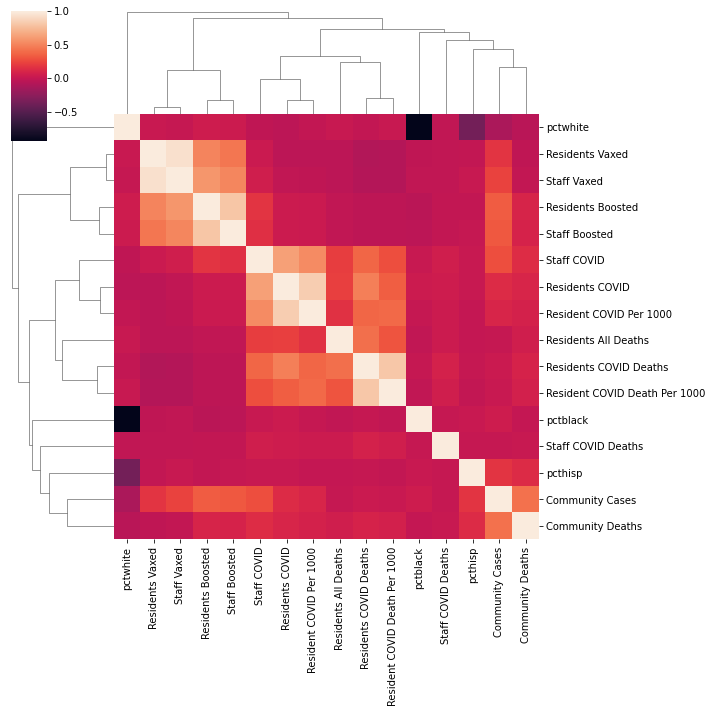

In [97]:
sns.clustermap(correlation_table.corr());

Residents Vaxed and Staff Vaxed are highly correlated: 0.945962

Resident COVID Deaths and Resident COVID Deaths Per 1000 are also highly correlated: 0.812167, which tells me that the affect of nursing home size is relatively small.

Same thing with Resident COVID and Resident COVID Per 1000:  0.841980.  Also supports that impact on nursing home size is small.  I think I can just track with Resident COVID Per 1000 (and deaths per 1000)

Staff COVID and Residents COVID are correlated:  0.627944

Staff COVID and Residents COVID Deaths also have correlation:  0.378138

Very weak correlation between Resident COVID and Community Cases:  0.137689

Very weak correlations between pctblack and Resident COVID/Resident COVID deaths.  Same thing with pcthisp and pctwhite.  All correlations are below .05.

Confusing to me is the very weak correlation between Resident COVID and Resident Vaxed (-0.035367).  From studies I have read about, the vaccine is much more effective at preventing COVID than that.

Next step:  Use Resident COVID Per 1000 and Resident COVID Deaths Per 1000 as dependent variables in ExtraTrees Regressor Analysis (drop Resident COVID and Resident COVID Deaths)

I think I can also drop Resident Total Deaths. There is a weak correlation (.2 or so) between Total Deaths and COVID Deaths.  Also a weak correlation between Total Deaths and Resident COVID

For independent variables:  community cases, community deaths, three demographics data points, staff COVID, staff vaxed, resident vaxed


In [102]:
feature_cols=(['Residents Vaxed','Staff Vaxed','Staff COVID','Residents Boosted','Staff Boosted','Community Cases','Community Deaths','pctblack','pcthisp','pctwhite'])

In [103]:
X=covid_analysis[feature_cols]
y=covid_analysis['Resident COVID Per 1000']

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [105]:
lr =LinearRegression()
type(lr)

sklearn.linear_model._base.LinearRegression

In [106]:
lr.fit(X_train,y_train)

LinearRegression()

In [107]:
covid_pred =lr.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_train, lr.predict(X_train))))
print(np.sqrt(metrics.mean_squared_error(y_test, covid_pred)))

40.8872558014395
39.25485009747439


In [108]:
y_null = np.zeros_like(y_test)
y_null.fill(y_test.mean())
y_null
np.sqrt(metrics.mean_squared_error(y_test,y_null))

46.8236862128942

In [109]:
covid_analysis['Resident COVID Per 1000'].describe()

count    538749.000000
mean          9.792266
std          48.263385
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        4666.670000
Name: Resident COVID Per 1000, dtype: float64

In [110]:
covid_analysis['covid_pred']=lr.predict(X)

In [111]:
predict_table= covid_analysis[['Resident COVID Per 1000','covid_pred']]
predict_table.head()

,Resident COVID Per 1000,covid_pred
0,0.0,2.755197
1,0.0,2.718895
2,0.0,2.780603
3,0.0,26.023813
4,0.0,2.631963


In [112]:
predict_table.describe()

,Resident COVID Per 1000,covid_pred
count,538749.000000,538749.000000
mean,9.792266,9.835976
std,48.263385,26.660210
min,0.000000,-53.634757
25%,0.000000,0.751278
50%,0.000000,3.008399
75%,0.000000,7.344769
max,4666.670000,1586.126324


In [113]:
features = ExtraTreesRegressor()
features.fit(X_train,y_train)
sorted(list(zip(features.feature_importances_,X)), reverse=True)

[(0.3617907377620516, 'Staff COVID'),
 (0.1795659146082084, 'pctwhite'),
 (0.15597393091791065, 'Community Cases'),
 (0.13133988981256545, 'Community Deaths'),
 (0.054222277490724315, 'pctblack'),
 (0.036059057596236, 'Residents Vaxed'),
 (0.02941798082494491, 'Staff Vaxed'),
 (0.023758295176827395, 'Residents Boosted'),
 (0.015600457655306762, 'Staff Boosted'),
 (0.01227145815522444, 'pcthisp')]

In [115]:
correlation_table2 = covid_analysis[['Staff COVID','Resident COVID Per 1000','Residents Vaxed','Staff Vaxed','Residents Boosted','Staff Boosted','Community Cases','Community Deaths','pctblack','pcthisp','pctwhite']]

In [116]:
correlation_table2.corr()

,Staff COVID,Resident COVID Per 1000,Residents Vaxed,Staff Vaxed,Residents Boosted,Staff Boosted,Community Cases,Community Deaths,pctblack,pcthisp,pctwhite
Staff COVID,1.000000,0.538518,0.032902,0.061235,0.180519,0.159485,0.288013,0.141611,0.014846,0.011958,-0.018644
Resident COVID Per 1000,0.538518,1.000000,-0.038488,-0.024963,0.032109,0.031847,0.107495,0.079915,0.006962,0.000751,-0.007335
Residents Vaxed,0.032902,-0.038488,1.000000,0.945962,0.505957,0.446161,0.185208,-0.024656,-0.023817,-0.005529,0.025883
Staff Vaxed,0.061235,-0.024963,0.945962,1.000000,0.578966,0.514937,0.240528,-0.005147,-0.013623,0.019001,0.006498
Residents Boosted,0.180519,0.032109,0.505957,0.578966,1.000000,0.804641,0.342914,0.095854,-0.046767,-0.006500,0.048488
Staff Boosted,0.159485,0.031847,0.446161,0.514937,0.804641,1.000000,0.322829,0.094694,-0.038329,0.011821,0.034488
Community Cases,0.288013,0.107495,0.185208,0.240528,0.342914,0.322829,1.000000,0.425095,0.044630,0.184618,-0.110448
Community Deaths,0.141611,0.079915,-0.024656,-0.005147,0.095854,0.094694,0.425095,1.000000,-0.000615,0.139950,-0.051593
pctblack,0.014846,0.006962,-0.023817,-0.013623,-0.046767,-0.038329,0.044630,-0.000615,1.000000,0.022849,-0.931054
pcthisp,0.011958,0.000751,-0.005529,0.019001,-0.006500,0.011821,0.184618,0.139950,0.022849,1.000000,-0.360434
